<a href="https://colab.research.google.com/github/Puneeth006/Deep_Learning_Fundamentals/blob/main/Deep_Learning_Assessment_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals Assessment 3

## RNNs for stock price prediction

<br/>

### 1. Imports

In [1]:
# Check Python version for compatibility with libraries
import sys
assert sys.version_info >= (3, 5)  # Ensures Python 3.5 or higher is used for compatibility

# Libraries for data manipulation
import numpy as np  # For numerical operations
import os  # For operating system interactions, like file operations
import time  # For handling time-related tasks
import pandas as pd  # For structured data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static and interactive visualizations
import matplotlib.dates as mdates  # For handling date formats in matplotlib
import seaborn as sns  # For more complex and aesthetically pleasing visualizations

# Handling date and time
import datetime  # For date and time manipulation
from datetime import timedelta  # For operations involving time differences

# Machine learning and data preprocessing
from sklearn.preprocessing import MinMaxScaler  # For data normalization and scaling
from sklearn.metrics import mean_squared_error  # For calculating mean squared error

# TensorFlow for neural networks and machine learning
import tensorflow as tf  # For building and training neural networks

# Statsmodels for statistical modeling
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposing time series data
from statsmodels.tsa.stattools import adfuller  # For performing the Augmented Dickey-Fuller test

# Configuration and customization for matplotlib
from pylab import rcParams  # For customizing Matplotlib plots

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings that don't require user action


<br/>

<br/>

### 2. Load the TESLA Stock Price Data



In [2]:
def gather_stock_data(brand, from_date, to_date, interval):
    """
    Fetches historical stock data for a specified brand within a date range and interval.

    Parameters:
    - brand: String representing the stock symbol for the company.
    - from_date: Integer Unix timestamp for the start date of the data retrieval.
    - to_date: Integer Unix timestamp for the end date of the data retrieval.
    - interval: String specifying the data interval (e.g., '1d' for daily data).

    Returns:
    - A Pandas DataFrame containing the historical stock data.
    """

    # Construct the query URL for Yahoo Finance API
    query = f'https://query1.finance.yahoo.com/v7/finance/download/{brand}?period1={from_date}&period2={to_date}&interval={interval}&events=history&includeAdjustedClose=true'

    # Read the data from the constructed URL and store it in a DataFrame
    stock_data = pd.read_csv(query)

    # Return the DataFrame with the stock data
    return stock_data

In [3]:
# Define the time period for fetching the data
# Convert the dates to Unix timestamp format for the API query
from_date = int(time.mktime(datetime.datetime(2017, 11, 12, 23, 59).timetuple()))
to_date = int(time.mktime(datetime.datetime(2023, 11, 12, 23, 59).timetuple()))
interval = '1d'  # Set the data interval (1 day in this case)

In [4]:
def rename_labels(stock_data):
    """
    Renames the columns of the stock data DataFrame to more descriptive labels.

    Parameters:
    - stock_data: DataFrame containing stock data with default or non-descriptive column names.

    Returns:
    - DataFrame with columns renamed to descriptive labels.
    """

    # Define a dictionary mapping old column names to new, more descriptive labels
    new_column_names = {
        'Open': 'opening_price',  # Opening price of the stock on a given day
        'High': 'highest_price',  # Highest price of the stock during the trading day
        'Low': 'lowest_price',    # Lowest price of the stock during the trading day
        'Close': 'closing_price', # Closing price of the stock at the end of the trading day
        'Adj Close': 'adjusted_closing_price', # Adjusted closing price of the stock
        'Volume': 'volume'        # Number of shares traded during the day
    }

    # Use the `rename` method to change column names based on the dictionary
    stock_data = stock_data.rename(columns=new_column_names)

    # Return the DataFrame with renamed columns
    return stock_data

In [5]:
# APPLE - 'AAPL'

# Fetch stock data for Apple using the defined function `gather_stock_data`
# which constructs the appropriate query and reads the data into a DataFrame
apple_stock = gather_stock_data('AAPL', from_date, to_date, interval)

# Rename the columns of the fetched Apple stock data for better readability
# using the `rename_labels` function which maps old column names to new ones
apple_stock = rename_labels(apple_stock)

# Display the last ten rows of the Apple stock data to check the recent data
# and ensure that the data has been gathered and labeled correctly
apple_stock.tail(10)

,Date,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,volume
1499,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000
1500,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000
1501,2023-11-01,171.000000,174.229996,170.119995,173.970001,173.741104,56934900
1502,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.336380,77334800
1503,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.417572,79763700
1504,2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
1505,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
1506,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
1507,2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
1508,2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400


In [6]:
# TESLA - 'TSLA'

# Fetch stock data for Tesla using the `gather_stock_data` function
# by providing the Tesla stock ticker symbol 'TSLA', and the defined time period and interval
tesla_stock = gather_stock_data('TSLA', from_date, to_date, interval)

# Update the column labels of the Tesla stock data for better clarity
# by applying the `rename_labels` function which assigns new, descriptive names to each column
tesla_stock = rename_labels(tesla_stock)

# Display the last ten rows of the Tesla stock data to ensure correct data retrieval
# and to inspect the latest stock information after renaming the columns
tesla_stock.tail(10)

,Date,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,volume
1499,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200
1500,2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300
1501,2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700
1502,2023-11-02,212.970001,219.199997,211.449997,218.509995,218.509995,125987600
1503,2023-11-03,221.149994,226.369995,218.399994,219.960007,219.960007,119281000
1504,2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800
1505,2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100
1506,2023-11-08,223.149994,224.149994,217.639999,222.110001,222.110001,106584800
1507,2023-11-09,219.750000,220.800003,206.679993,209.979996,209.979996,142110500
1508,2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000



<br/>

<br/>

### 3. Exploratory Data Analysis

In [7]:
# shape of the dataset
display(apple_stock.shape)
display(tesla_stock.shape)

(1509, 7)

(1509, 7)

Both the apple and tesla stock datasets have 1509 rows and 7 columns

<br/>

In [8]:
# General Information about the Apple dataset
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1509 non-null   object 
 1   opening_price           1509 non-null   float64
 2   highest_price           1509 non-null   float64
 3   lowest_price            1509 non-null   float64
 4   closing_price           1509 non-null   float64
 5   adjusted_closing_price  1509 non-null   float64
 6   volume                  1509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [9]:
# General Information about the Tesla dataset
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1509 non-null   object 
 1   opening_price           1509 non-null   float64
 2   highest_price           1509 non-null   float64
 3   lowest_price            1509 non-null   float64
 4   closing_price           1509 non-null   float64
 5   adjusted_closing_price  1509 non-null   float64
 6   volume                  1509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


**Analysis of Apple and Tesla Datasets:**

* There are 7 columns and 1509 entries in the dataset
* There are no null values present in the dataset
* All the prices are of type float64 except volume which is int64. The date column is converted to type datetime64

<br/>

In [10]:
# Find the number of missing values for each column
print(np.sum(apple_stock.isna()))

Date                      0
opening_price             0
highest_price             0
lowest_price              0
closing_price             0
adjusted_closing_price    0
volume                    0
dtype: int64


In [11]:
# Find the number of missing values for each column
print(np.sum(tesla_stock.isna()))

Date                      0
opening_price             0
highest_price             0
lowest_price              0
closing_price             0
adjusted_closing_price    0
volume                    0
dtype: int64


**Analysis:**
There are no missing values present in both the datasets

<br/>

<br/>

#### Summary Statastics

**APPLE**

In [12]:
# Summary statastics for the APPLE data
apple_stock.describe()

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,107.058544,108.299712,105.911532,107.161206,105.524532,1.085144e+08
std,50.420598,50.980083,49.902912,50.468767,50.806572,5.457635e+07
min,35.994999,36.430000,35.500000,35.547501,34.118874,3.145820e+07
25%,52.115002,52.432499,51.687500,52.167500,50.155083,7.304660e+07
50%,120.059998,121.430000,118.570000,119.989998,118.083839,9.448720e+07
75%,150.089996,151.570007,148.610001,150.589996,149.206009,1.289068e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,4.265100e+08


**Apple Stock Price Trend Analysis:**

The dataset outlines Apple's stock price data across 1509 trading days. Here's a concise analysis:

1. **Opening Price**: On average, Apple's stock opened at 107.06 USD, with a standard deviation of 50.42 USD, indicating notable variability.

2. **Highest and Lowest Prices**: The average highest daily price was 108.30 USD, while the average lowest was 105.91 USD. This reflects an average daily fluctuation of approximately 2.39 USD.

3. **Closing Price**: The average closing price stood slightly higher than the opening at 107.16 USD, with a standard deviation of 50.47 USD, suggesting similar variability.

4. **Adjusted Closing Price**: The average adjusted closing price, factoring in dividends and splits, was 105.52 USD, with a higher standard deviation (50.81 USD), implying greater variation post-adjustments.

5. **Volume**: Trading volume averaged around 108.5 million shares per day, with significant variability indicated by a standard deviation of 54.58 million.

6. **Range Analysis**:
    - The range for opening prices was between 35.99 USD and 196.24 USD.
    - The highest and lowest prices recorded were 198.23 USD and 35.50 USD, respectively.
    - Closing prices varied from 35.55 USD to 196.45 USD.
    - Adjusted closing prices ranged from 34.12 USD to 195.93 USD.

7. **Quartiles**:
    - The 25th percentile for prices hovered around 52.11 USD, indicating that prices were below this value 25% of the time.
    - The median (50th percentile) was around 120.06 USD, representing the middle value.
    - The 75th percentile was approximately 150.09 USD, suggesting that 75% of the prices fell below this mark.

This analysis indicates that Apple's stock experienced significant volatility, with considerable daily price changes and trading volume variability. The data reflects a general trading range of 35.99 USD to 198.23 USD over the period analyzed.

<br/>

<br/>

**TESLA**

In [13]:
# Summary statastics for the TESLA data
tesla_stock.describe()

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,141.177784,144.377399,137.718589,141.126362,141.126362,1.325539e+08
std,114.143277,116.661869,111.318078,114.005292,114.005292,8.395297e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.695999,22.219999,21.449333,21.879999,21.879999,7.964400e+07
50%,141.910004,145.380005,139.033340,141.766663,141.766663,1.077098e+08
75%,239.139999,244.666672,234.213333,238.820007,238.820007,1.550325e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


**Tesla Stock Price Trend Analysis:**

The dataset presents an analysis of Tesla's stock prices over 1509 trading days:

1. **Opening Price**: The average opening price was approximately 141.18 USD, with a high standard deviation of 114.14 USD, reflecting significant variability.

2. **Highest and Lowest Prices**: The average highest daily price was 144.38 USD, while the average lowest was 137.72 USD. This indicates an average daily fluctuation of around 6.66 USD.

3. **Closing Price**: The average closing price was nearly identical to the opening at 141.13 USD, with a standard deviation of 114.01 USD, suggesting similar levels of variability.

4. **Adjusted Closing Price**: The adjusted closing price, mirroring the closing price, averaged 141.13 USD with the same standard deviation of 114.01 USD, indicating no adjustments for dividends or stock splits.

5. **Volume**: The average trading volume was about 132.55 million shares per day, with a considerable standard deviation of 83.95 million, pointing to high variability in trading activity.

6. **Range Analysis**:
    - The range for opening prices was from a low of 12.07 USD to a high of 411.47 USD.
    - The highest recorded price was 414.50 USD, and the lowest was 11.80 USD.
    - Closing prices varied between 11.93 USD and 409.97 USD.

7. **Quartiles**:
    - The 25th percentile for prices was around 21.70 USD, suggesting that prices were below this value for 25% of the time.
    - The median (50th percentile) was 141.91 USD.
    - The 75th percentile was approximately 239.14 USD, indicating that 75% of the prices fell below this level.

This analysis indicates that Tesla's stock experienced significant volatility with considerable daily price movements and varied trading volumes. The stock traded within a broad range of roughly 12 to 414 USD during the analyzed period, reflecting its dynamic nature in the stock market.

<br/>

<br/>

#### TREND

Identifying the trend of a stock price is a fundamental aspect of decision science related to financial markets. It allows investors and analysts to discern the general direction in which a stock price is moving over a period. Recognizing an uptrend can signal a good investment opportunity, suggesting that the stock value might continue to rise. Conversely, a downtrend may warn of a potential decline, prompting investors to sell or short-sell. Moreover, trend analysis contributes to the development of forecasting models by providing a historical baseline, from which future price movements can be predicted with greater confidence. Understanding trends is also crucial for risk management, portfolio diversification, and strategic planning, making it an indispensable tool in the toolkit of financial decision-making.

In [14]:
def plot_stock_prices_and_volume(stock_data):
    """
    Plots the stock prices and volume over time from a provided DataFrame 'stock_data'.

    The DataFrame 'stock_data' must contain the following columns:
    'date', 'opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price', 'volume'.

    This function will create two side-by-side line plots:
    - Left plot for each price type with dates on the x-axis and price in USD on the y-axis.
    - Right plot for the trading volume over time.
    Dates are displayed with an interval of 50 days.
    """

    # Convert 'date' to datetime if it's not already in that format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Setting up the subplot layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plotting each stock price type on the first subplot
    ax1.plot(stock_data['Date'], stock_data['opening_price'], label='Opening Price')
    ax1.plot(stock_data['Date'], stock_data['highest_price'], label='Highest Price')
    ax1.plot(stock_data['Date'], stock_data['lowest_price'], label='Lowest Price')
    ax1.plot(stock_data['Date'], stock_data['closing_price'], label='Closing Price')
    ax1.plot(stock_data['Date'], stock_data['adjusted_closing_price'], label='Adjusted Closing Price')

    # Adding title and axis labels to the first subplot
    ax1.set_title('Stock Prices Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in USD')

    # Configuring date format on x-axis for the first subplot
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=100))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.tick_params(axis='x', rotation=90)
    ax1.grid(True)

    # Adding a legend to the first subplot
    ax1.legend()

    # Plotting the volume on the second subplot
    ax2.plot(stock_data['Date'], stock_data['volume'], label='Volume', color='black')

    # Adding title and labels to the second subplot
    ax2.set_title('Stock Trading Volume Over Time')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')

    # Configuring date format on x-axis for the second subplot
    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.tick_params(axis='x', rotation=90)
    ax2.grid(True)

    # Adding a legend to the second subplot
    ax2.legend()

    # Displaying the plot
    plt.tight_layout()
    plt.show()


<br/>

**APPLE**

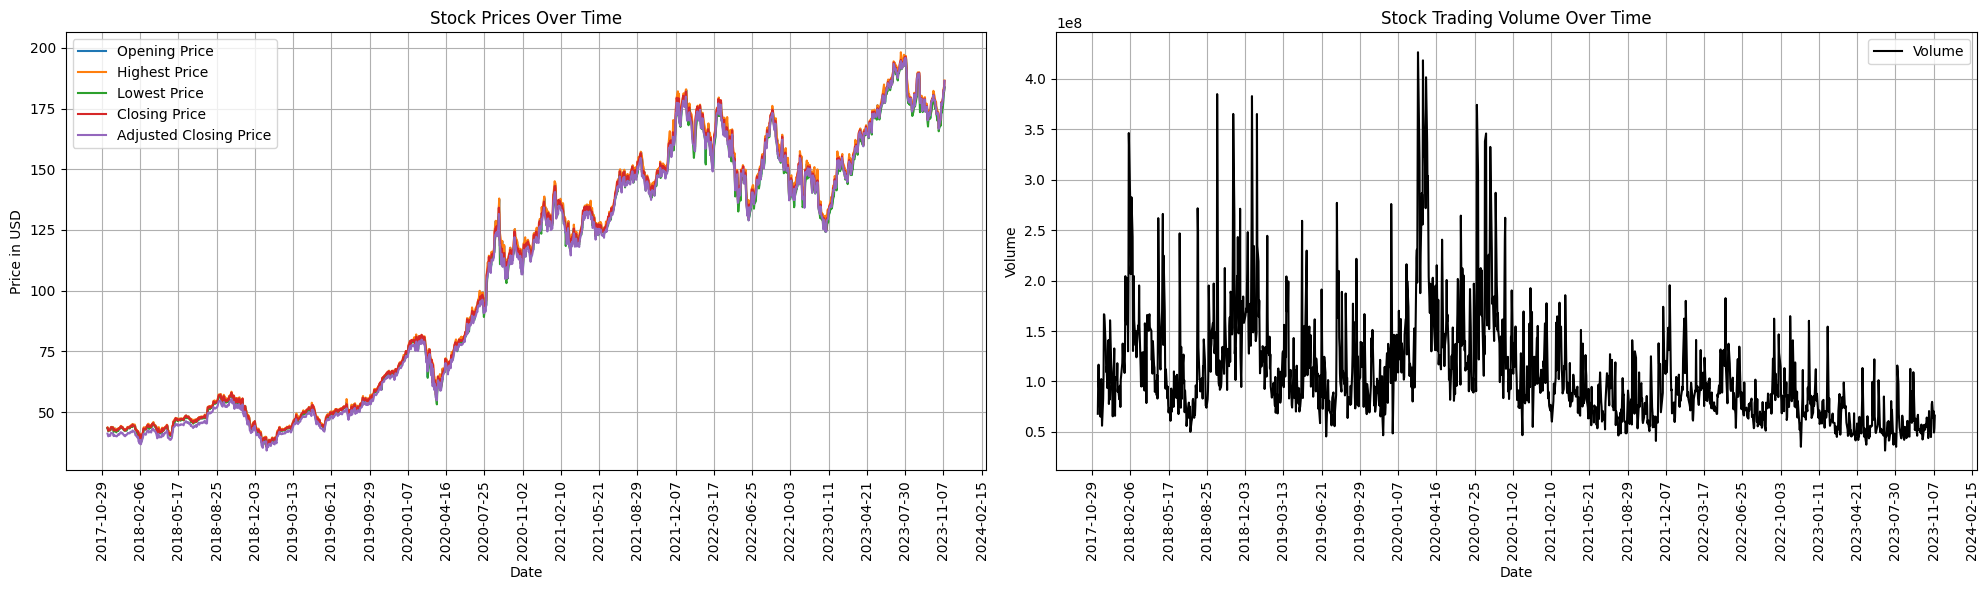

In [15]:
# plot the stock price aginst time for apple
plot_stock_prices_and_volume(apple_stock)

**Analysis:**

The trend in the "Stock Prices Over Time" graph for Apple stock shows a general upward trajectory over the three-year period from early 2020 to late 2022. Despite some fluctuations and periods of volatility, the stock prices appear to have increased overall.

For the "Stock Trading Volume Over Time," the trend is less clear-cut. The volume has varied significantly throughout the same period, with several spikes indicating periods of high trading activity. However, there is no distinct upward or downward trend in trading volume; it fluctuates without a clear long-term pattern.

<br/>

<br/>

**TESLA**

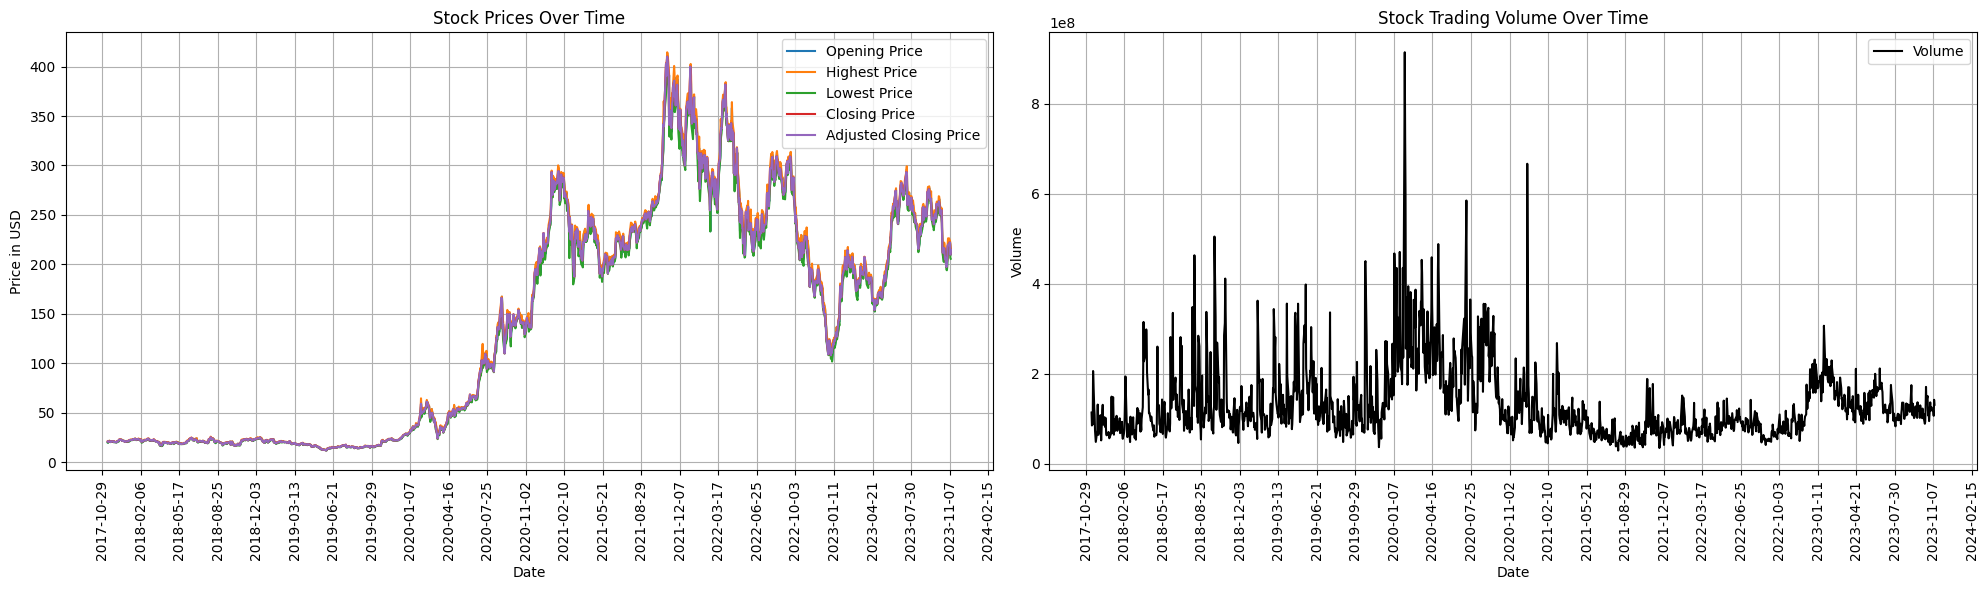

In [16]:
# plot the stock price aginst time for tesla
plot_stock_prices_and_volume(tesla_stock)

**Analysis:**

The price graph depicts a volatile trend for Tesla over the approximate three-year period displayed. The stock price shows a significant rise initially, reaching a peak before experiencing a sharp decline. Following this decline, there is a notable recovery, with prices climbing once again, only to be followed by another decline and subsequent recovery pattern. Throughout the graph, the prices fluctuate substantially, which is characteristic of Tesla's stock history known for its volatility.

The volume graph also exhibits volatility with several notable spikes, indicating periods of high trading activity. Unlike the stock prices, the volume does not have a clear upward or downward trend but rather shows significant variability over time.

<br/>

<br/>

#### DAILY STOCK RETURNS

daily returns are a fundamental metric in financial data science, aiding in the understanding of market behavior and guiding strategic investment decisions.

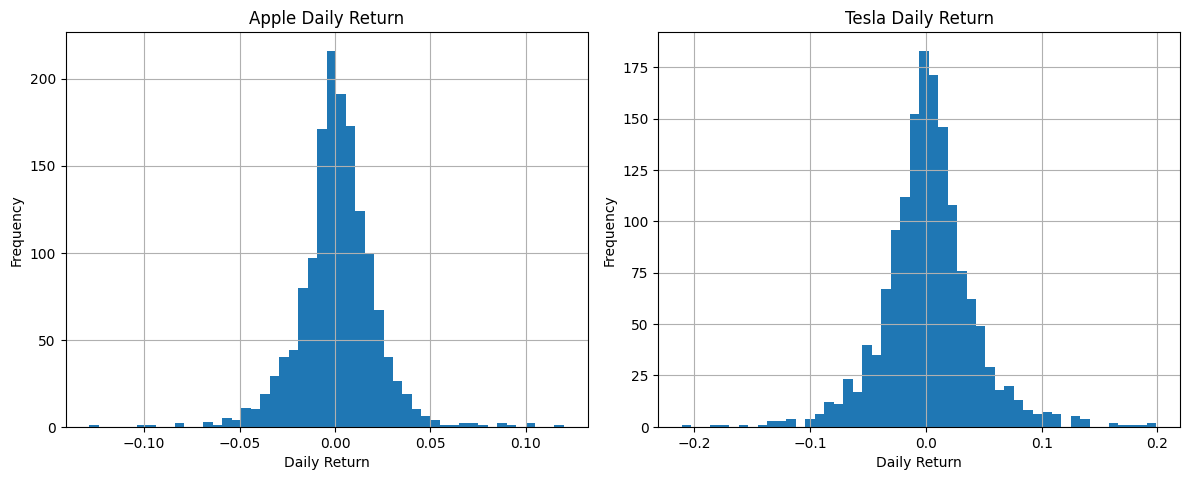

In [17]:
# List of company data and their names for plotting
company_list = [apple_stock, tesla_stock]
company_name = ['Apple', 'Tesla']

# Set up the figure for plotting
plt.figure(figsize=(12, 9))

# Loop through each company to plot their daily return distribution
for i, company in enumerate(company_list, 1):
    # Calculate daily returns as percentage change in closing price
    company['daily_return'] = company['closing_price'].pct_change()

    # Create a histogram of daily returns with 50 bins
    plt.subplot(2, 2, i)
    company['daily_return'].hist(bins=50)

    # Set the xlabel and ylabel for the plot
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

    # Title for each subplot based on company name
    plt.title(f'{company_name[i-1]} Daily Return')

# Adjust layout for better fit and display plot
plt.tight_layout()
plt.show()

**Analysis:**

The above histograms represent the distribution of daily returns for Apple and Tesla stocks. These histograms can provide insights into the volatility of the stock prices. For example, a narrower and taller peak indicates less volatility, while a wider distribution suggests higher volatility. The mean of the distributions appears to be around zero, but the exact shape and spread could indicate the likelihood of extreme changes in stock prices. Analyzing such graphs helps investors understand the risk and return profile of their investments.

<br/>

<br/>

#### SEASONAL DECOMPOSITION

Seasonal decomposition graphs are vital in data science, particularly for time series analysis, as they break down a series into three components: trend, seasonality, and residuals. This allows for:

1. **Understanding Underlying Trends**: Identifying long-term movements in data, which are crucial for understanding the direction in which the series is moving.

2. **Seasonality Assessment**: Recognizing and quantifying periodic fluctuations which can be critical for businesses that are affected by seasonal factors.

3. **Noise Isolation**: Separating the 'noise' from the signal, which helps in making more accurate predictions by focusing on the underlying patterns rather than the noise.

4. **Modeling and Forecasting**: Providing insights that can improve the performance of forecasting models by accounting for regular patterns and trends.

Overall, these graphs are essential tools for uncovering patterns in data that might not be immediately apparent and for making informed decisions based on those patterns.

In [18]:
def check_seasonality(stock_data):
    """
    This function performs seasonal decomposition on the adjusted closing price
    from the stock data to analyze and plot its seasonal, trend, and residual components.

    Parameters:
    - stock_data: DataFrame containing the stock data with a 'date' and 'adjusted_closing_price' columns.

    The function assumes the 'date' column is in a datetime format and set as the index.
    """

    # Select relevant columns for seasonality analysis
    variables = stock_data.loc[:, ["Date", "closing_price"]]
    # Set 'date' as the index for time series analysis
    variables.set_index('Date', inplace=True)
    # Aggregate data by month, taking the mean of the adjusted closing prices
    stock_data_aggregated = variables.resample('M').mean()

    # Analyze and plot the additive components of seasonality
    rcParams['figure.figsize'] = 13, 5  # Set figure size for the plot
    ts_decomposition_additive = seasonal_decompose(x=stock_data_aggregated.closing_price, model='additive')
    ts_decomposition_additive.plot()
    plt.show()

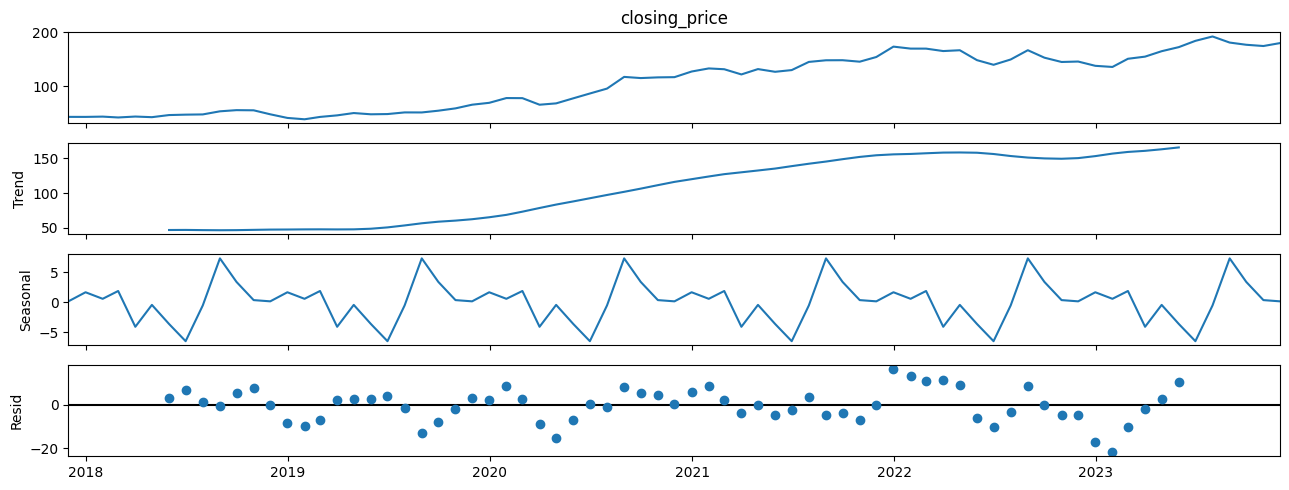

In [19]:
# Check seasonality for Apple
check_seasonality(apple_stock)

**Analysis:**

1. Closing Price: The data seems quite stable with a slight upward trend, suggesting a gradual increase in the closing price.

2. Trend: In this case, the trend is upward, indicating a general rise in stock prices over the period.

3. Seasonal: The fluctuations seen here suggest a repeating pattern within the given timeframe, which could be related to quarterly financial cycles, monthly patterns, or other cyclical factors.

4. Residual: Ideally, these should be randomly scattered around zero, indicating that the trend and seasonal components have adequately explained most of the variability in the data.

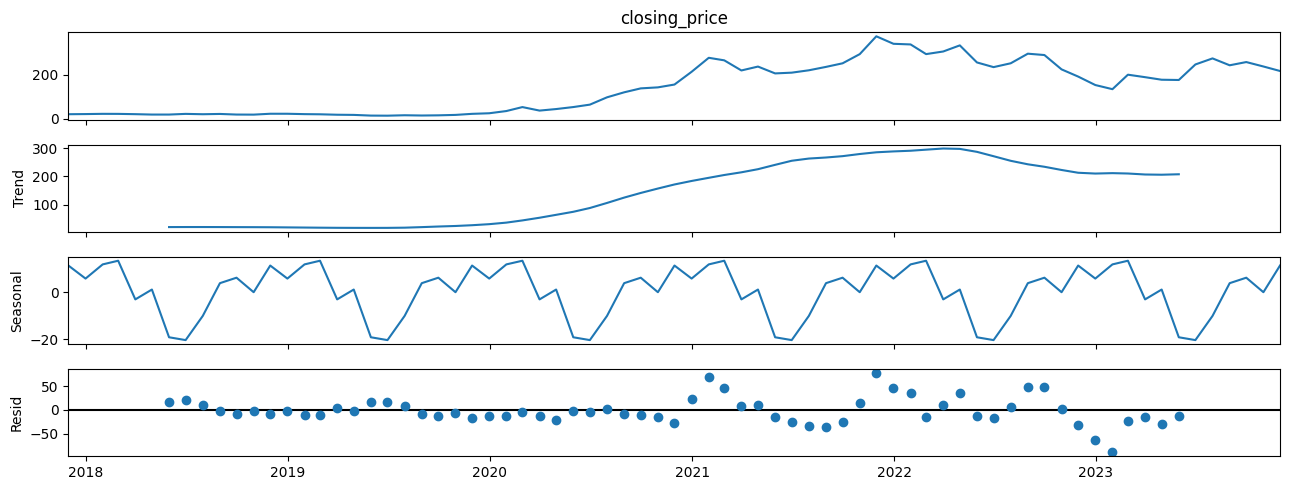

In [20]:
# Check seasonality for Tesla
check_seasonality(tesla_stock)

**Analysis:**

1. **Closing Price**: Displays stability with a minor increasing trend, suggesting the stock's value is gradually rising over time.

2. **Trend**: Illustrates an overall upward trajectory, indicating a consistent growth in stock prices, which may reflect positive market conditions or company growth.

3. **Seasonal**: Reveals repeating patterns or cycles, potentially linked to regular market events, such as quarterly financial reports or seasonal sales impacts.

4. **Residual**: Shows data points that the model couldn't explain, ideally scattered randomly around the zero line, indicating that the identified trend and seasonal factors have captured the primary movements in the data. Any significant patterns in the residuals might suggest additional, unaccounted-for influences.

<br/>

#### MOVING AVERAGE

In the context of data science, the Moving Average (MA) test is significant because it helps in identifying and understanding trends within time series data. It smooths out short-term fluctuations, providing a clearer view of the underlying trend or pattern. This is particularly useful in forecasting future values by capturing the central tendency over a specified time frame. Moreover, the Moving Average is used in various domains, such as financial market analysis, weather forecasting, and inventory control, to make informed decisions by observing the direction and strength of trends. It is also a foundational component in more complex time series analyses and forecasting models.

In [21]:
def plot_multiple_moving_averages(data, window_sizes):
    """
    Plots multiple moving averages for the 'closing_price' of the stock data.

    Parameters:
    - data: A pandas DataFrame with a 'closing_price' column.
    - window_sizes: A list of integers where each integer is a window size for the moving average.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['closing_price'], label='Closing Price', alpha=0.5)

    # Calculate and plot each moving average specified in window_sizes
    for window in window_sizes:
        data[f'moving_average_{window}'] = data['closing_price'].rolling(window=window).mean()
        plt.plot(data['Date'], data[f'moving_average_{window}'], label=f'{window}-Day Moving Average')

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.title('Moving Averages of Closing Prices')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.legend()
    plt.show()

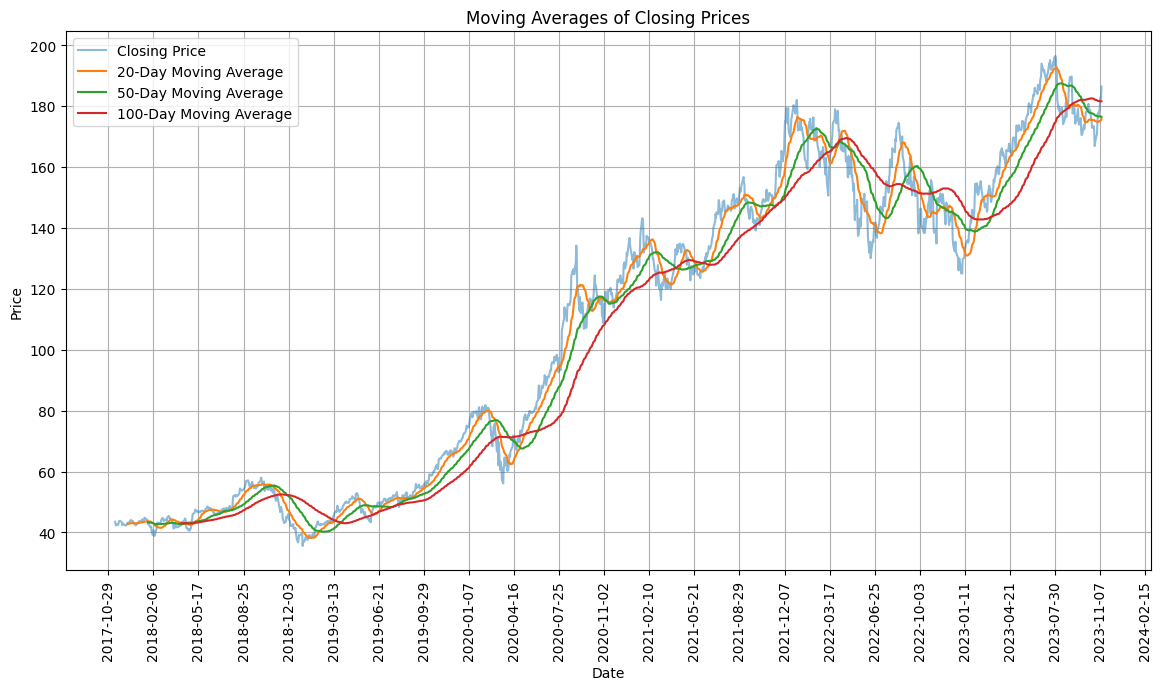

In [22]:
# AAPL
# Plot moving averages for Apple
plot_multiple_moving_averages(apple_stock, [20, 50, 100])

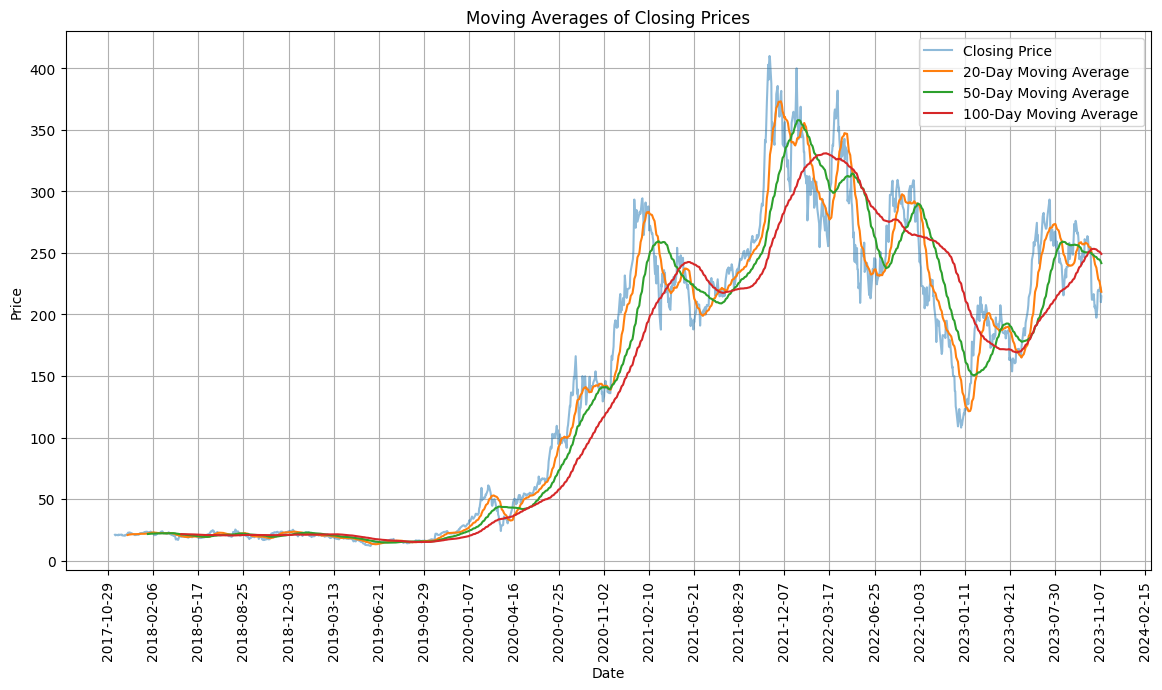

In [23]:
# TSLA
# Plot moving averages for Tesla
plot_multiple_moving_averages(tesla_stock, [20, 50, 100])

**Analysis:**

For both the Apple and Tesla plots, the 20 day and 50 day moving averages seem to following trends which also includes sudden highs and lows wheras the 100 day moving average does not seem to follow the sudden highs and lows

<br/>


#### FEATURE SELECTION FOR PRICE FORCAST

Feature selection using a heatmap is pivotal in data science as it aids in visualizing and identifying the most influential variables that impact the output. It helps to discern correlations, allowing data scientists to focus on relevant features, reducing the complexity of models, and improving their interpretability. By eliminating redundant or irrelevant features, computational efficiency is enhanced, potentially improving the performance of predictive models. Heatmaps also make it easier to communicate complex correlation structures in a digestible format, facilitating more informed and strategic decisions in model development and data analysis.

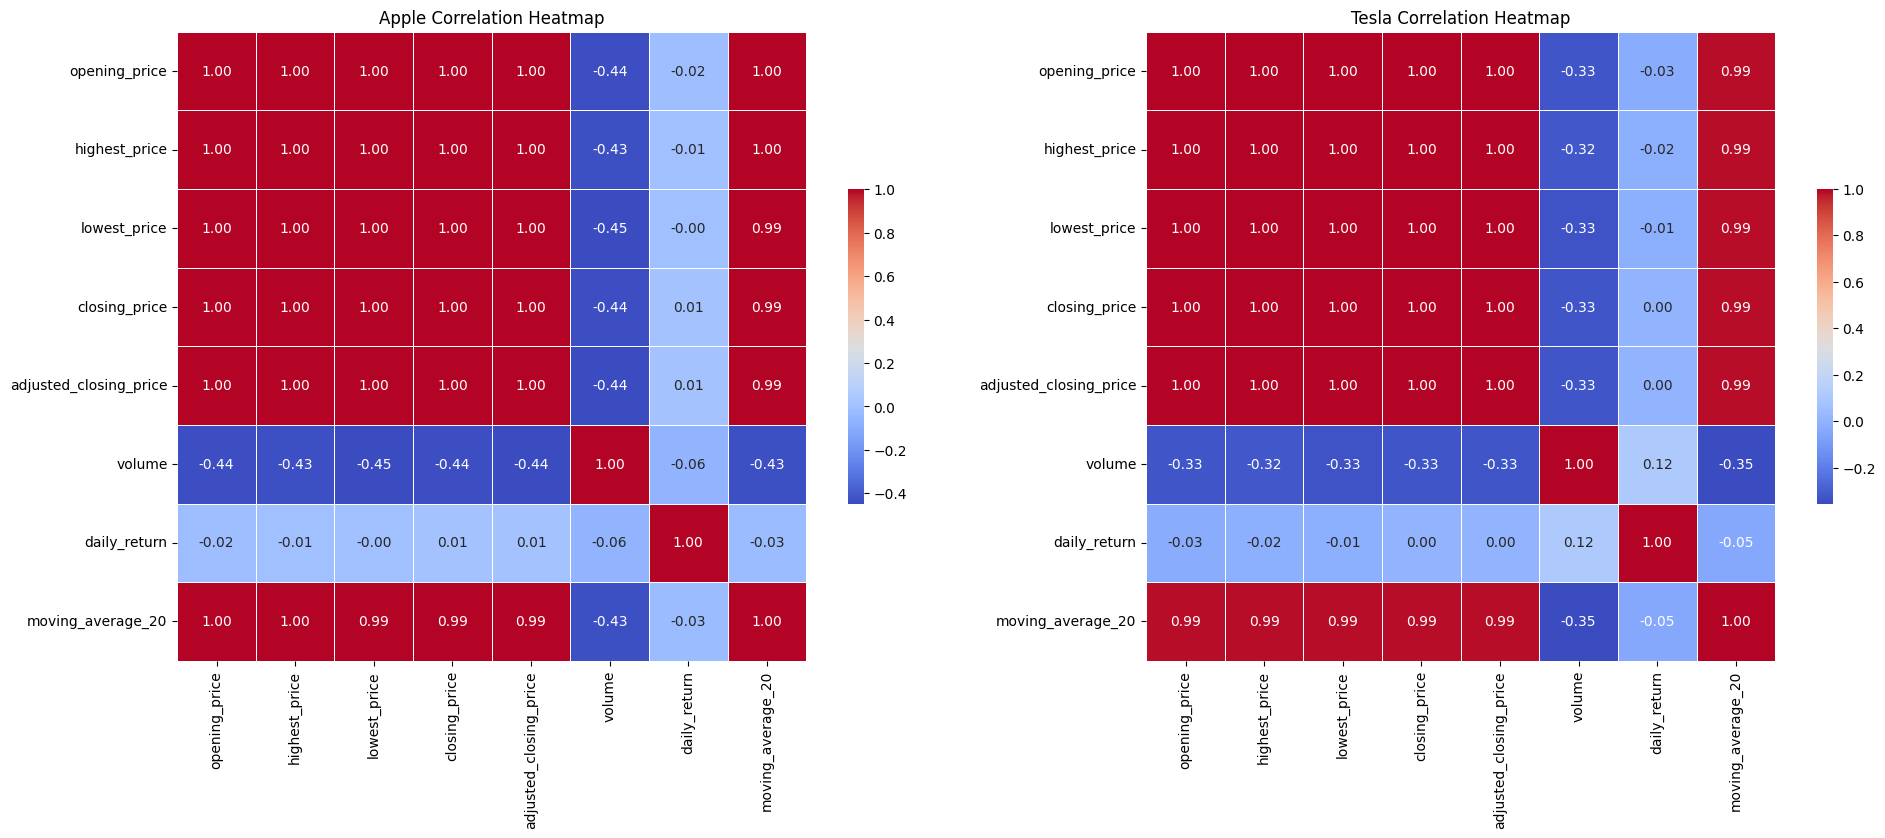

In [24]:
def plot_side_by_side_heatmap(company_list, company_name):
    """
    Plots heatmaps for multiple companies side by side, representing the correlation
    between different variables of each company's stock data.

    Parameters:
    - company_list: List of pandas DataFrames containing stock data for each company.
    - company_name: List of company names as strings.

    Returns:
    - A figure with side-by-side heatmaps displaying the correlation between the DataFrame's variables.
    """
    num_companies = len(company_list)
    fig, axes = plt.subplots(1, num_companies, figsize=(20, 8))

    for i, company in enumerate(company_list):
        # Compute the correlation matrix for each company
        corr_matrix = company.iloc[:,:9].corr()

        # Draw the heatmap for each company
        sns.heatmap(corr_matrix, ax=axes[i], annot=True, fmt=".2f", cmap='coolwarm',
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        axes[i].set_title(f'{company_name[i]} Correlation Heatmap')

    # Display the heatmaps
    plt.tight_layout()
    plt.show()

# Now you can call this function with your list of DataFrames and company names
plot_side_by_side_heatmap(company_list, company_name)

**Analysis:**

From both the heatmaps above we find that, all the prices are highly correlated. Hence, we can consider only 'closing price' for forcasting future stock prices.

<br/>

<br/>

#### STATIONARITY CHECK

Stationary data has properties—mean, variance, and autocorrelation—that do not change over time, making it easier to model and predict. Non-stationary data, with properties that change, can lead to unreliable and misleading models.

The Dickey-Fuller test is a statistical test for stationarity. Specifically, it tests the null hypothesis that a unit root is present in an autoregressive model. If the test statistic is less than the critical value, we reject the null hypothesis and infer that the time series is stationary. This test is vital because many time series models require the data to be stationary to provide accurate and meaningful results.

In [25]:
def check_stationarity(timeseries):
    """
    Perform Dickey-Fuller test to check the stationarity of a time series.

    Parameters:
    - timeseries: Pandas Series, the time series to be tested.

    Returns:
    - None, but prints the test results.
    """
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [26]:
# Check stationarity for Apple
check_stationarity(apple_stock['closing_price'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.547305
p-value                           0.882450
#Lags Used                        9.000000
Number of Observations Used    1499.000000
Critical Value (1%)              -3.434720
Critical Value (5%)              -2.863470
Critical Value (10%)             -2.567798
dtype: float64


**Analysis:**

Here's an analysis of the given results for Apple stock price:

- **Test Statistic > Critical Values**: The test statistic is higher than the critical values, which means we fail to reject the null hypothesis.
- **p-value**: The p-value 0.882450 is much higher than the common significance levels (0.01, 0.05, 0.10), indicating that the null hypothesis cannot be rejected.
- **Lags Used**: This indicates the number of lags included in the test for autocorrelation.

Overall, these results suggest that the Apple stock price time series is not stationary, as there is not enough evidence to reject the null hypothesis that a unit root is present. Non-stationarity means that the statistical properties of the series such as mean, variance, and autocorrelation are not constant over time, which can affect the predictive modeling.

In [27]:
# Check stationarity for Tesla
check_stationarity(tesla_stock['closing_price'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.473550
p-value                           0.546553
#Lags Used                       24.000000
Number of Observations Used    1484.000000
Critical Value (1%)              -3.434764
Critical Value (5%)              -2.863490
Critical Value (10%)             -2.567808
dtype: float64


Here's an analysis of the given results for Tesla stock price:

- **Test Statistic vs. Critical Values**: The test statistic (-1.473550) is above all the critical values, suggesting that we cannot reject the null hypothesis of the presence of a unit root.
- **p-value**: At 0.546553, the p-value is much greater than the typical alpha levels (0.01, 0.05, 0.10), which implies that the null hypothesis of non-stationarity cannot be rejected with high confidence.
- **Lags Used**: The test has taken into account 24 lags to account for autocorrelation.

Overall, like with the Apple stock, the Tesla stock price data also seems to exhibit non-stationary behavior according to the Dickey-Fuller test. This non-stationarity must be addressed before using the data for predictive modeling in time series analysis.

<br/>

<br/>

### 4. Data Preprocessing

<br/>

#### MAKE THE DATA STATIONERY

We already found previously using seasonal decomposition test that there is a trend in the data for both Apple and Tesla. It needs to be eliminated by applying a log transform and use a square root to flatten it

##### Apply Log transform and square root

In [28]:
def plot_transformed_data(stock_data, brand):
    """
    Plots the transformed closing price data for a given stock.

    Parameters:
    - stock_data: DataFrame containing the stock data, including the transformed 'log_closing_price' column.
    - brand: String, the name of the company or brand to be used in the plot title.

    The function assumes that 'stock_data' has a 'Date' column properly formatted as a datetime object.
    """
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    # Plot the logarithmically transformed closing price
    plt.plot(stock_data['Date'], stock_data['log_closing_price'], label='Log Transformed Closing Price')
    plt.title(f'Transformed data for {brand}')
    # Set x-axis labels with an interval of 50 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
    plt.xlabel('Date')
    plt.ylabel('Log Transformed Price')
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

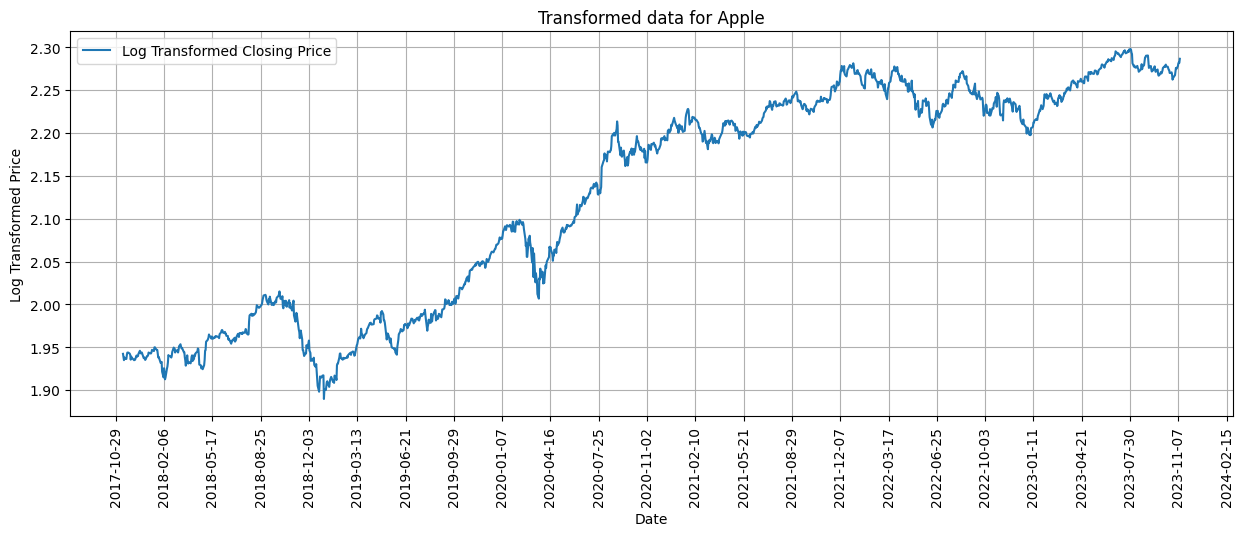

In [29]:
## Apple
# Calculate the square root of the logarithmic transformation of the closing prices
apple_stock['log_closing_price'] = np.sqrt(np.log(apple_stock['closing_price']))

# Call the function to plot the transformed data, passing in the Apple stock DataFrame and the brand name
plot_transformed_data(apple_stock, 'Apple')

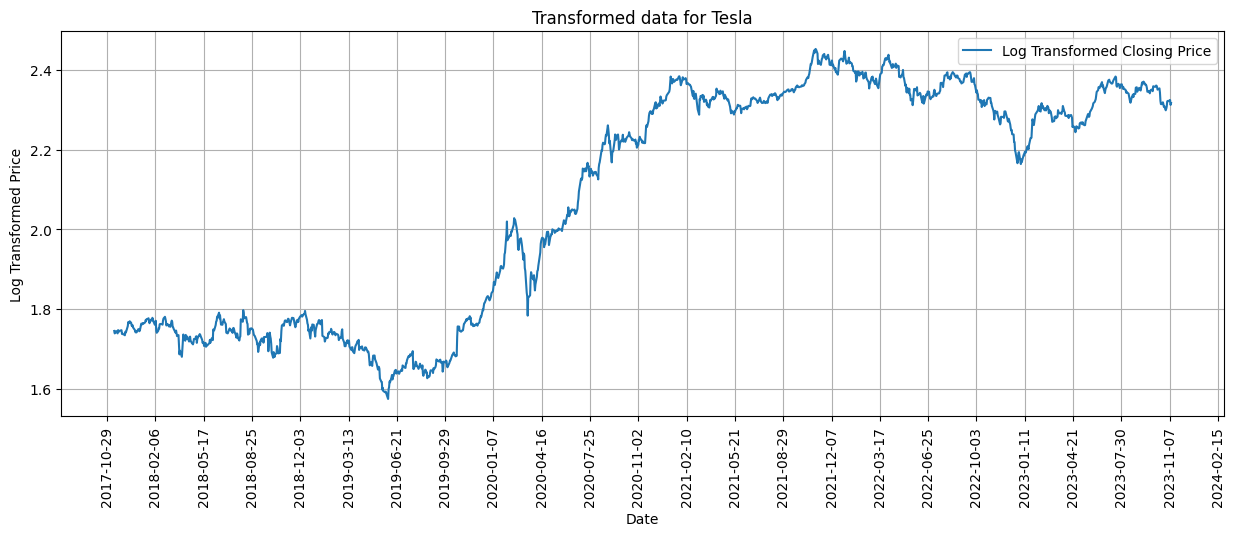

In [30]:
## Tesla
# Apply a transformation to the closing price: square root of the logarithm of the closing price
tesla_stock['log_closing_price'] = np.sqrt(np.log(tesla_stock['closing_price']))

# Call the function to plot the transformed data for Tesla
plot_transformed_data(tesla_stock, 'Tesla')

##### Differenciate the Data

The concept of differencing in time series analysis, especially in the context of stock prices, addresses the challenges of trend and seasonality in the data. This method involves subtracting the previous observation's value from the current observation's value. By doing so, differencing aims to remove the series' dependency on time, thus stabilizing the mean of the time series. This process helps in achieving stationarity, where the statistical properties of the series like mean and variance do not change over time, making it more amenable to modeling and forecasting. This technique is particularly useful in preparing data for classical time series forecasting methods.

In [31]:
def plot_stationary_data(time_series, dates, brand):
    """
    Plots stationary closing price data for a specific stock.

    Parameters:
    - time_series: A pandas Series or array containing stationary closing price data.
    - dates: A pandas Series or array containing corresponding dates for the time_series data.
    - brand: String representing the name of the stock or brand for labeling purposes.

    This function plots the stationary closing price data against the dates.
    It is used to visualize the effectiveness of stationarity transformation on time series data.
    """

    plt.figure(figsize=(15, 5))  # Set the size of the plot
    plt.grid(True)  # Enable grid for easier reading of plot

    # Plot the stationary data with appropriate labels
    plt.plot(dates, time_series, label='Stationary Closing Price')
    plt.title(f'Stationary Closing Price for {brand}')  # Set the title of the plot

    # Configure x-axis to show date labels at an interval of 100 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
    plt.xlabel('Date')  # Label for x-axis
    plt.ylabel('Stationary Closing Price')  # Label for y-axis

    plt.legend()  # Show legend
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    plt.show()  # Display the plot

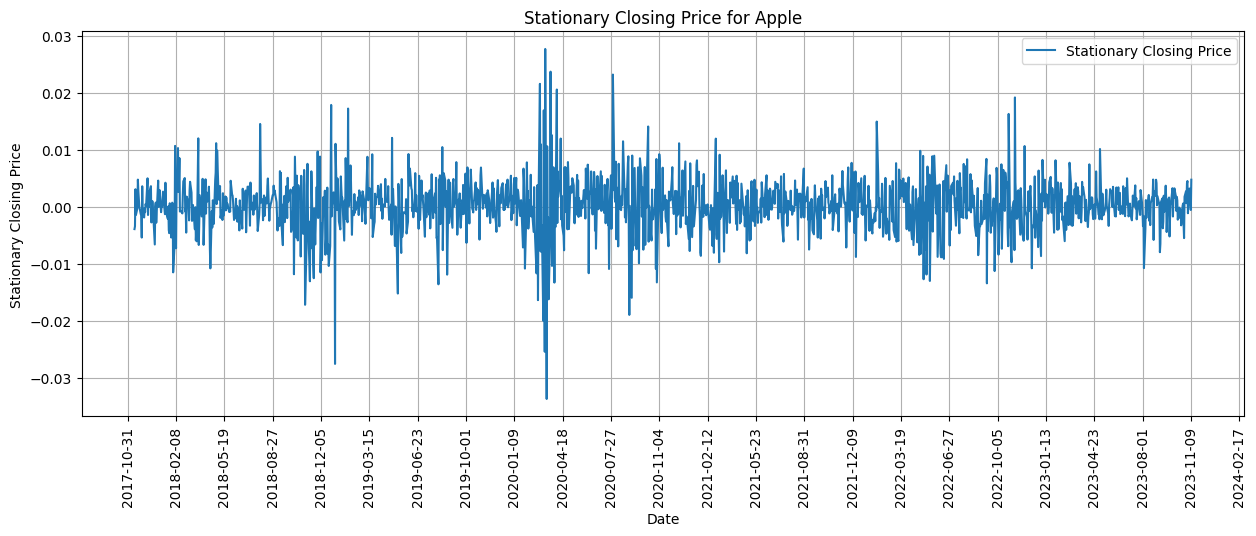

Results of Dickey-Fuller Test:
Test Statistic                -1.210054e+01
p-value                        2.023152e-22
#Lags Used                     8.000000e+00
Number of Observations Used    1.499000e+03
Critical Value (1%)           -3.434720e+00
Critical Value (5%)           -2.863470e+00
Critical Value (10%)          -2.567798e+00
dtype: float64


In [32]:
# APPLE
# Perform differencing to make the data stationary
apple_close_shift = apple_stock['log_closing_price'] - apple_stock['log_closing_price'].shift()

# Remove any NaN values created due to shifting
apple_close_shift.dropna(inplace=True)

# Plot the stationary data for Apple stock
plot_stationary_data(apple_close_shift, apple_stock['Date'][1:], 'Apple')

# Check if the differenced data is stationary
check_stationarity(apple_close_shift)

**Analysis:**

The Dickey-Fuller test for the time series after differencing shows the following:

- **Test Statistic vs. Critical Values**: The test statistic (-12.10054) is significantly lower than the critical values at 1%, 5%, and 10% levels. This strongly suggests rejection of the null hypothesis of a unit root, indicating stationarity.
- **p-value**: With a p-value of approximately 2.02e-22, the test provides strong evidence against the null hypothesis, reinforcing the conclusion that the series is stationary.
- **Lags Used**: 8 lags were utilized in the test, showing the extent to which past values were considered for the analysis.

Overall, the results clearly indicate that the differenced series is stationary, making it suitable for time series forecasting models.

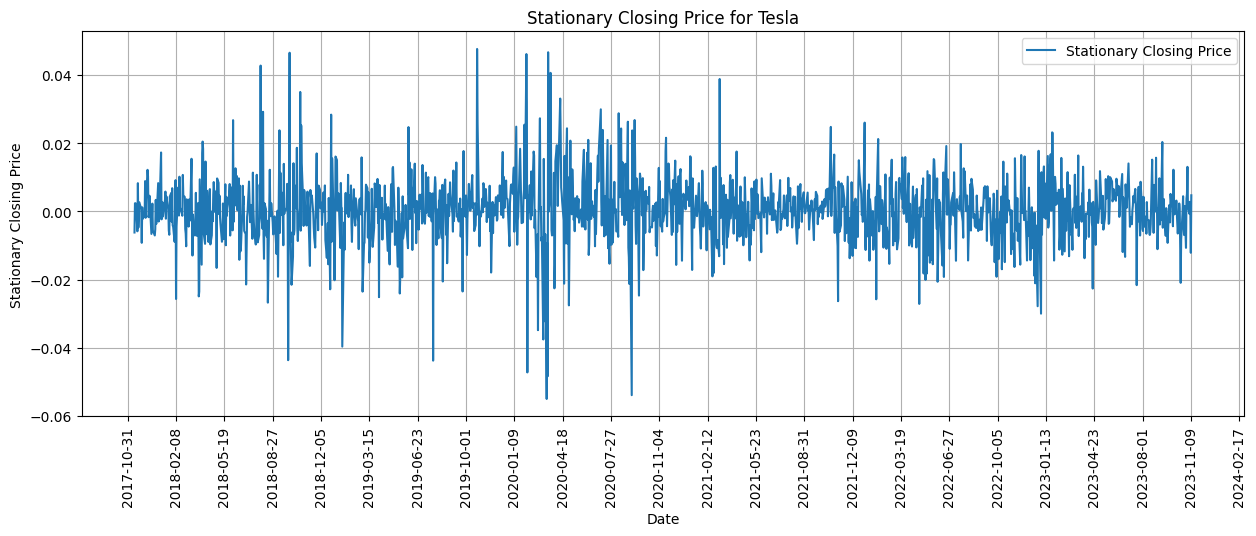

Results of Dickey-Fuller Test:
Test Statistic                  -26.576298
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1506.000000
Critical Value (1%)              -3.434700
Critical Value (5%)              -2.863461
Critical Value (10%)             -2.567793
dtype: float64


In [33]:
# TESLA
# Perform differencing to make the data stationary
tesla_close_shift = tesla_stock['log_closing_price'] - tesla_stock['log_closing_price'].shift()

# Remove any NaN values created due to shifting
tesla_close_shift.dropna(inplace=True)

# Plot the stationary data for Tesla stock
plot_stationary_data(tesla_close_shift, tesla_stock['Date'][1:], 'Tesla')

# Check if the differenced data is stationary
check_stationarity(tesla_close_shift)

**Analysis:**

The Dickey-Fuller test for Tesla stock price after differencing yields the following results:

- **Test Statistic vs. Critical Values**: The test statistic (-26.576298) is far below the critical values at 1%, 5%, and 10% significance levels. This indicates strong evidence against the null hypothesis, suggesting the series is stationary.
- **p-value**: The p-value is effectively zero, providing strong evidence against the null hypothesis and confirming the stationarity of the series.
- **Lags Used**: Only 1 lag was used, indicating minimal dependence on previous values for the analysis.

In summary, the results indicate that the differenced Tesla stock price series is stationary and suitable for time series analysis models.



As both the Apple and Tesla closing prices are now become stationary, we can proceed forward for training the models

<br/>

<br/>

### **5. Split Data into Train, Valid and Test Datasets**

**2/3 of data is trained, 1/6 of data is validated, 1/6 of data is tested**

In [34]:
def split_data(time_series, seq_len):
    """
    Splits the adjusted closing price difference data of a specific company into
    training, validation, and testing datasets based on a defined sequence length.

    Parameters:
    - time_series: series containing stock data including an 'log_closing_price_diff' column.
    - company: String representing the company to filter the stock data.
    - seq_len: Integer specifying the length of the input sequences for the model.

    Returns:
    - A tuple of datasets: (X_train, y_train), (X_valid, y_valid), (X_test, y_test).
    """

    # Extract the adjusted closing price difference data
    data_raw = time_series.values

    # Prepare data for sequence learning by creating subsequences
    data = []
    # Create subsequences of length `seq_len`
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    # Convert list of subsequences to a NumPy array
    data = np.array(data)

    # Define the sizes for train, test, and validation sets
    train_size = int(np.round(2/3 * data.shape[0]))
    test_size = int(np.round(1/6 * data.shape[0]))
    valid_size = data.shape[0] - train_size - test_size

    # Split the data into training, validation, and testing sets
    X_train = data[:train_size, :-1]  # Training features
    y_train = data[:train_size, -1]   # Training labels
    X_valid = data[train_size:train_size + valid_size, :-1]  # Validation features
    y_valid = data[train_size:train_size + valid_size, -1]   # Validation labels
    X_test = data[train_size + valid_size:, :-1]  # Testing features
    y_test = data[train_size + valid_size:, -1]   # Testing labels

    # Reshape the datasets for LSTM compatibility
    # The reshaping converts data into the format [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return (X_train, y_train, X_valid, y_valid, X_test, y_test)

In [35]:
# Apple
# Create train, validation, and test datasets for Apple (AAPL) stock
seq_len = 150  # Choose the length of the sequence for the model

# Use the split_data function to create datasets
X_train_APPL, y_train_APPL, X_valid_APPL, y_valid_APPL, X_test_APPL, y_test_APPL = split_data(apple_close_shift, seq_len)

# Print out the shapes of the created datasets to verify their dimensions
print('Apple Stock Data')
print('X_train_APPL.shape = ', X_train_APPL.shape)  # Training features shape
print('y_train_APPL.shape = ', y_train_APPL.shape)  # Training labels shape
print('X_valid_APPL.shape = ', X_valid_APPL.shape)  # Validation features shape
print('y_valid_APPL.shape = ', y_valid_APPL.shape)  # Validation labels shape
print('X_test_APPL.shape = ', X_test_APPL.shape)    # Test features shape
print('y_test_APPL.shape = ', y_test_APPL.shape)    # Test labels shape

Apple Stock Data
X_train_APPL.shape =  (905, 149, 1)
y_train_APPL.shape =  (905,)
X_valid_APPL.shape =  (227, 149, 1)
y_valid_APPL.shape =  (227,)
X_test_APPL.shape =  (226, 149, 1)
y_test_APPL.shape =  (226,)


In [36]:
# Tesla
# Create train, validation, and test datasets for Tesla (TSLA) stock
seq_len = 150  # Define the sequence length, which determines how many days of stock prices each sequence contains

# Use the split_data function to generate datasets for LSTM modeling
X_train_TSLA, y_train_TSLA, X_valid_TSLA, y_valid_TSLA, X_test_TSLA, y_test_TSLA = split_data(tesla_close_shift, seq_len)

# Print the shapes of the datasets to verify their dimensions
print('Tesla Stock Data')
print('X_train_TSLA.shape = ', X_train_TSLA.shape)  # shape of training features dataset
print('y_train_TSLA.shape = ', y_train_TSLA.shape)  # shape of training labels dataset
print('X_valid_TSLA.shape = ', X_valid_TSLA.shape)  # shape of validation features dataset
print('y_valid_TSLA.shape = ', y_valid_TSLA.shape)  # shape of validation labels dataset
print('X_test_TSLA.shape = ', X_test_TSLA.shape)    # shape of test features dataset
print('y_test_TSLA.shape = ', y_test_TSLA.shape)    # shape of test labels dataset

Tesla Stock Data
X_train_TSLA.shape =  (905, 149, 1)
y_train_TSLA.shape =  (905,)
X_valid_TSLA.shape =  (227, 149, 1)
y_valid_TSLA.shape =  (227,)
X_test_TSLA.shape =  (226, 149, 1)
y_test_TSLA.shape =  (226,)



<br/>

<br/>

### **6. Train and Validate Data**

In [37]:
# Parameters for building the LSTM model

# n_steps: Number of time steps in each input sequence
n_steps = seq_len - 1

# n_inputs: Number of input features per time step
n_inputs = 1

# n_neurons: Number of neurons (or units) in each LSTM layer
n_neurons = 50

# n_outputs: Number of output features
n_outputs = 1

# learning_rate: Learning rate for the optimizer
learning_rate = 0.001

# batch_size: Number of samples processed before the model's internal parameters are updated
batch_size = 32

# n_epochs: Number of complete passes through the training dataset
n_epochs = 50

In [38]:
def create_feedforward_model(X_train):
    """
    Creates a Multilayer Perceptron (MLP) model for stock price prediction using TensorFlow and Keras.

    Parameters:
    - X_train: Training data which is used to determine the input shape for the model.

    Returns:
    - A compiled TensorFlow Keras Sequential model consisting of dense layers.
    """
    model = tf.keras.Sequential([
        # First hidden layer with ELU activation function and input shape defined by the training data
        tf.keras.layers.Dense(4, input_shape=(X_train.shape[1], X_train.shape[2])),

        # Flatten layer to transform input for dense layer processing
        tf.keras.layers.Flatten(),

        # Output layer with a single neuron for generating a prediction
        tf.keras.layers.Dense(1)
    ])

    return model

In [39]:
def create_simple_rnn_model(X_train):
    """
    Creates a Sequential RNN model using TensorFlow and Keras. The model consists of a SimpleRNN layer
    followed by a dense output layer. It's designed to work on time series data for tasks like stock price prediction.

    Parameters:
    - X_train: Training data used to specify the input shape of the model.

    Returns:
    - A compiled TensorFlow Keras Sequential model with a SimpleRNN layer and a Dense output layer.
    """
    # Initialize a Sequential model
    model = tf.keras.Sequential()

    # Add a SimpleRNN layer with specified number of neurons
    model.add(tf.keras.layers.SimpleRNN(units=n_neurons, input_shape=(X_train.shape[1], X_train.shape[2])))

    # Output layer with a single neuron for prediction
    model.add(tf.keras.layers.Dense(1))

    # Return the constructed model
    return model

In [40]:
def create_lstm_model(X_train):
    """
    Constructs a Sequential LSTM model using TensorFlow and Keras. The model comprises an LSTM layer
    and a dense output layer. This setup is ideal for time series data analysis, such as stock price forecasting,
    where capturing long-term dependencies is crucial.

    Parameters:
    - X_train: Training data used to define the input shape of the model.

    Returns:
    - A compiled TensorFlow Keras Sequential model with an LSTM layer and a Dense output layer.
    """
    # Initialize a Sequential model
    model = tf.keras.Sequential()

    # Add an LSTM layer with specified number of neurons
    model.add(tf.keras.layers.LSTM(units=n_neurons, input_shape=(X_train.shape[1], X_train.shape[2])))

    # Output layer with a single neuron for prediction
    model.add(tf.keras.layers.Dense(1))

    # Return the constructed LSTM model
    return model

In [41]:
def train_model(model, X_train, y_train, X_valid, y_valid):
    """
    This function finalizes the construction of a Sequential neural network model,
    compiles and fits the model to the given training and validation data.
    The function incorporates early stopping to prevent overfitting.
    It tracks the validation loss and stops training if the loss doesn't decrease after a certain number of epochs.

    Parameters:
    - model: The pre-initialized Sequential model to be trained.
    - X_train: Array of training data inputs (features).
    - y_train: Array of training data outputs (targets or labels).
    - X_valid: Array of validation data inputs.
    - y_valid: Array of validation data outputs.

    Returns:
    - A tuple containing the trained model and its training history (model, history).
    """

    # Compile the model with Mean Squared Error as the loss function and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['mean_absolute_error'])

    # Set up EarlyStopping callback for efficient training
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

    # Train the model using provided training and validation data
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

    # Return the trained model and its history
    return model, history

In [42]:
def calculate_metrics(y_true, y_pred):
    """
    Calculates and prints the Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    between the true values and predicted values.

    Parameters:
    - y_true: The actual values (ground truth).
    - y_pred: The predicted values from the model.

    This function calculates the MSE and MAE, which are common metrics for evaluating regression models.
    MSE measures the average squared difference between the estimated values and actual value,
    while MAE measures the average absolute difference.
    """
    # Calculate Mean Squared Error
    # MSE is the mean of the squared differences between true and predicted values
    mse = round(np.mean(np.square(y_true - y_pred)), 6)

    # Calculate Mean Absolute Error
    # MAE is the mean of the absolute differences between true and predicted values
    mae = round(np.mean(np.abs(y_true - y_pred)), 6)

    # Print the calculated metrics
    print('MSE:', mse)
    print('MAE:', mae)

In [43]:
def evaluate_model(model, X_test, y_test, batch_size=32):
    """
    Evaluates the given model on the test data and prints the test Mean Squared Error (MSE) and Mean Absolute Error (MAE).

    Parameters:
    - model: The trained Sequential model.
    - X_test: Test data inputs (features).
    - y_test: Test data outputs (labels or targets).
    - batch_size: The size of the batches used during evaluation.
    """
    print("Evaluate on test data")
    results = model.evaluate(X_test, y_test, batch_size=batch_size)
    print("Test MSE:", results[0])
    print("Test MAE:", results[1])

    return results

In [44]:
def predict_and_plot(model, X_test, stock_data):
    """
    Makes predictions using the provided model and test data, and plots the actual vs predicted closing prices.

    Parameters:
    - model: The trained Sequential model.
    - X_test: Test data inputs (features).
    - stock_data: DataFrame containing the actual stock data.

    The function assumes that 'stock_data' has 'Date' and 'log_closing_price' columns and
    that the test set size matches the last part of the stock_data.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Creating a DataFrame for predicted data with date-time indexes
    pred_data = pd.DataFrame(y_pred[:, 0], stock_data.Date[-len(X_test):], columns=['closing_price'])

    # Add the differenciation term
    pred_data['closing_price'] += stock_data['log_closing_price'].shift().values[-len(X_test):]

    # Apply inverse transformations
    pred_data = pred_data.apply(np.square)
    pred_data = pred_data.apply(np.exp)

    # Plot actual prices vs predicted prices
    plt.figure(figsize=(15, 5))
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(stock_data.Date[-len(X_test):], stock_data['closing_price'][-len(X_test):], 'b', label='Actual prices')
    plt.plot(stock_data.Date[-len(X_test):], pred_data, 'orange', label='Predicted prices')
    plt.title('True vs Predicted Closing prices')
    plt.legend()
    plt.grid(True)
    plt.show()

    return pred_data

In [45]:
# Dataframes to track performance of models on Apple and Tesla data
model_performance_AAPL = pd.DataFrame(columns = ['network', 'validation_mse', 'validation_mae', 'test_mse', 'test_mae', 'original_scale_test_rmse'])
model_performance_TSLA = pd.DataFrame(columns = ['network', 'validation_mse', 'validation_mae', 'test_mse', 'test_mae', 'original_scale_test_rmse'])

### **APPLE**

#### Baseline - Feed Forward Network

In [46]:
# Create an feedforward model for Apple's stock data
feedforward_model_APPL = create_feedforward_model(X_train_APPL)

# model summary
feedforward_model_APPL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 149, 4)            8         
                                                                 
 flatten (Flatten)           (None, 596)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 597       
                                                                 
Total params: 605 (2.36 KB)
Trainable params: 605 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Train the feedforward model with Apple's stock data
feedforward_model_APPL, history = train_model(feedforward_model_APPL, X_train_APPL, y_train_APPL, X_valid_APPL, y_valid_APPL)

Epoch 1/50
29/29 [==============================] - 2s 22ms/step - loss: 4.4556e-05 - mean_absolute_error: 0.0050 - val_loss: 3.8538e-05 - val_mean_absolute_error: 0.0049
Epoch 2/50
29/29 [==============================] - 0s 11ms/step - loss: 3.3524e-05 - mean_absolute_error: 0.0043 - val_loss: 3.4654e-05 - val_mean_absolute_error: 0.0046
Epoch 3/50
29/29 [==============================] - 0s 8ms/step - loss: 2.8967e-05 - mean_absolute_error: 0.0040 - val_loss: 3.3290e-05 - val_mean_absolute_error: 0.0045
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 2.6700e-05 - mean_absolute_error: 0.0038 - val_loss: 3.1058e-05 - val_mean_absolute_error: 0.0044
Epoch 5/50
29/29 [==============================] - 0s 10ms/step - loss: 2.5165e-05 - mean_absolute_error: 0.0037 - val_loss: 2.9212e-05 - val_mean_absolute_error: 0.0042
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 2.3732e-05 - mean_absolute_error: 0.0035 - val_loss: 2.9059e-05 - val_mean_

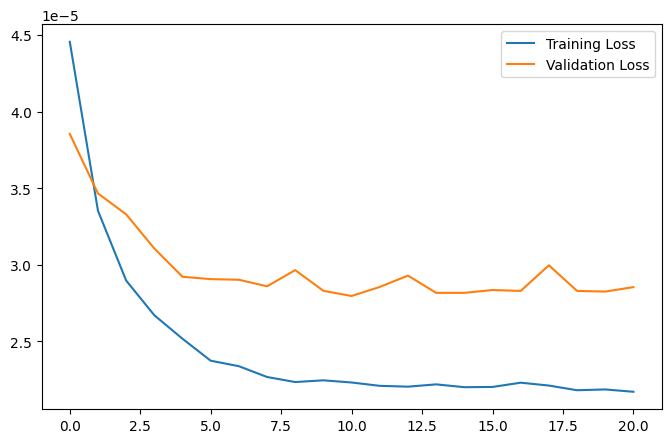

In [48]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [49]:
# Evaluate the model on the test data using
test_results = evaluate_model(feedforward_model_APPL, X_test_APPL, y_test_APPL)

Evaluate on test data
8/8 [==============================] - 0s 3ms/step - loss: 1.3118e-05 - mean_absolute_error: 0.0028
Test MSE: 1.3118482456775382e-05
Test MAE: 0.002794170519337058


8/8 [==============================] - 0s 3ms/step


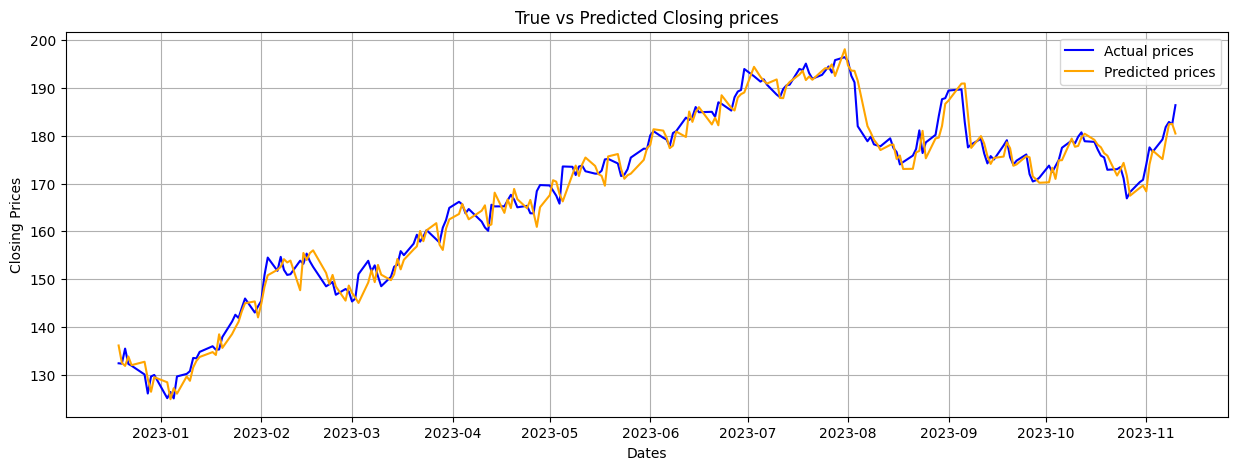

In [50]:
# Plot true vs predicted
y_test_pred_feedforward_APPL = predict_and_plot(feedforward_model_APPL, X_test_APPL, apple_stock)

In [51]:
# Original Scale MSE
original_mse = mean_squared_error(apple_stock['closing_price'][-len(y_test_pred_feedforward_APPL):], y_test_pred_feedforward_APPL)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 6.557882117402843


In [52]:
# Append the model information to the dataframe
model_performance_AAPL.loc[len(model_performance_AAPL)] = ["Feed Forward", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

#### Simple RNN

In [53]:
# Create an RNN model for Apple's stock data
rnn_model_APPL = create_simple_rnn_model(X_train_APPL)

# model summary
rnn_model_APPL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Train the RNN model with Apple's stock data
rnn_model_APPL, history = train_model(rnn_model_APPL, X_train_APPL, y_train_APPL, X_valid_APPL, y_valid_APPL)

Epoch 1/50
29/29 [==============================] - 2s 31ms/step - loss: 6.3357e-04 - mean_absolute_error: 0.0132 - val_loss: 7.3603e-05 - val_mean_absolute_error: 0.0069
Epoch 2/50
29/29 [==============================] - 1s 23ms/step - loss: 6.6666e-05 - mean_absolute_error: 0.0061 - val_loss: 5.6693e-05 - val_mean_absolute_error: 0.0061
Epoch 3/50
29/29 [==============================] - 1s 28ms/step - loss: 5.2120e-05 - mean_absolute_error: 0.0053 - val_loss: 4.9542e-05 - val_mean_absolute_error: 0.0057
Epoch 4/50
29/29 [==============================] - 1s 32ms/step - loss: 4.6474e-05 - mean_absolute_error: 0.0050 - val_loss: 4.3386e-05 - val_mean_absolute_error: 0.0053
Epoch 5/50
29/29 [==============================] - 1s 32ms/step - loss: 4.2475e-05 - mean_absolute_error: 0.0048 - val_loss: 3.9949e-05 - val_mean_absolute_error: 0.0051
Epoch 6/50
29/29 [==============================] - 1s 23ms/step - loss: 3.7100e-05 - mean_absolute_error: 0.0044 - val_loss: 3.8563e-05 - val_me

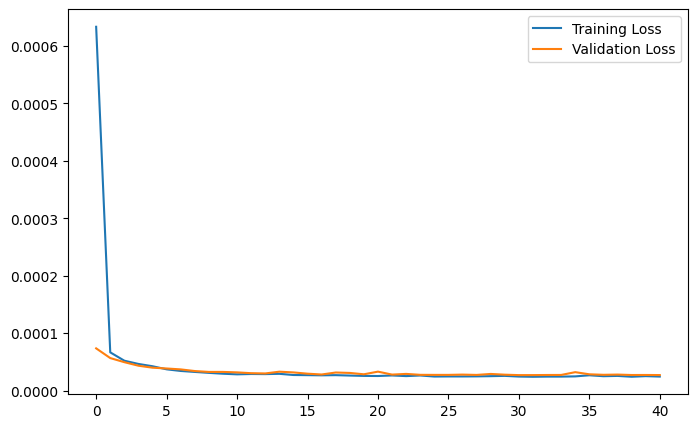

In [55]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [56]:
# Evaluate the model on the test data using
test_results = evaluate_model(rnn_model_APPL, X_test_APPL, y_test_APPL)

Evaluate on test data
8/8 [==============================] - 0s 8ms/step - loss: 1.0660e-05 - mean_absolute_error: 0.0025
Test MSE: 1.0659689905878622e-05
Test MAE: 0.0025120205245912075


8/8 [==============================] - 0s 9ms/step


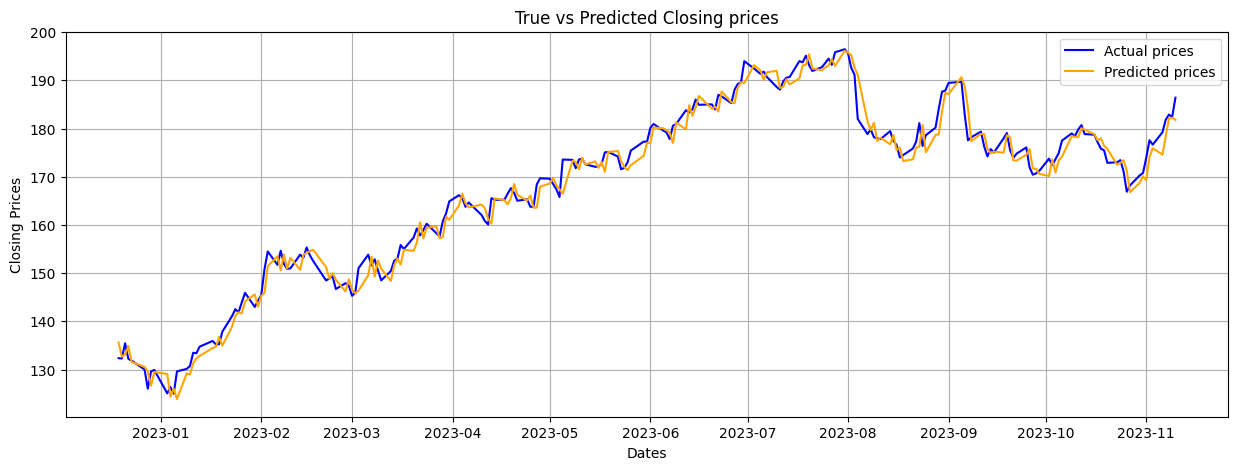

In [57]:
# Plot true vs predicted
y_test_pred_rnn_APPL = predict_and_plot(rnn_model_APPL, X_test_APPL, apple_stock)

In [58]:
# Original Scale MSE
original_mse = mean_squared_error(apple_stock['closing_price'][-len(y_test_pred_rnn_APPL):], y_test_pred_rnn_APPL)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 5.670188423029229


In [59]:
# Append the model information to the dataframe
model_performance_AAPL.loc[len(model_performance_AAPL)] = ["Simple RNN", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

#### LSTM

In [60]:
# Create an LSTM model for Apple's stock data
lstm_model_APPL = create_lstm_model(X_train_APPL)

# model summary
lstm_model_APPL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Train the LSTM model with Apple's stock data
lstm_model_APPL, history = train_model(lstm_model_APPL, X_train_APPL, y_train_APPL, X_valid_APPL, y_valid_APPL)

Epoch 1/50
29/29 [==============================] - 5s 86ms/step - loss: 3.4099e-05 - mean_absolute_error: 0.0044 - val_loss: 2.7831e-05 - val_mean_absolute_error: 0.0041
Epoch 2/50
29/29 [==============================] - 2s 57ms/step - loss: 2.6888e-05 - mean_absolute_error: 0.0036 - val_loss: 2.6234e-05 - val_mean_absolute_error: 0.0039
Epoch 3/50
29/29 [==============================] - 2s 57ms/step - loss: 2.7385e-05 - mean_absolute_error: 0.0036 - val_loss: 2.6045e-05 - val_mean_absolute_error: 0.0039
Epoch 4/50
29/29 [==============================] - 2s 75ms/step - loss: 2.7590e-05 - mean_absolute_error: 0.0037 - val_loss: 2.6118e-05 - val_mean_absolute_error: 0.0039
Epoch 5/50
29/29 [==============================] - 3s 100ms/step - loss: 2.7376e-05 - mean_absolute_error: 0.0037 - val_loss: 2.6307e-05 - val_mean_absolute_error: 0.0040
Epoch 6/50
29/29 [==============================] - 2s 61ms/step - loss: 2.7090e-05 - mean_absolute_error: 0.0036 - val_loss: 2.6051e-05 - val_m

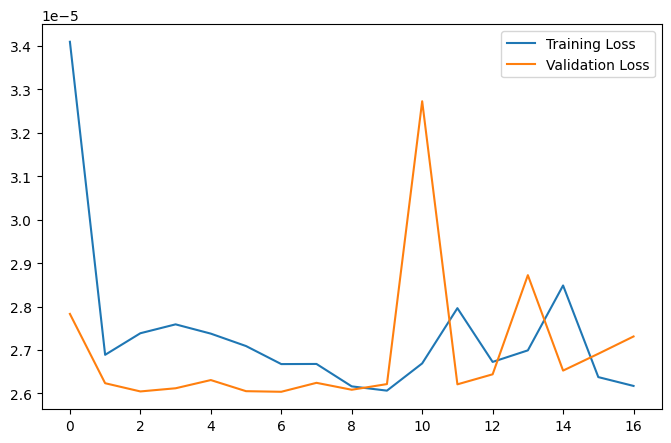

In [62]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [63]:
# Evaluate the model on the test data using
test_results = evaluate_model(lstm_model_APPL, X_test_APPL, y_test_APPL)

Evaluate on test data
8/8 [==============================] - 0s 16ms/step - loss: 9.8329e-06 - mean_absolute_error: 0.0024
Test MSE: 9.832875548454467e-06
Test MAE: 0.002425172133371234


8/8 [==============================] - 1s 14ms/step


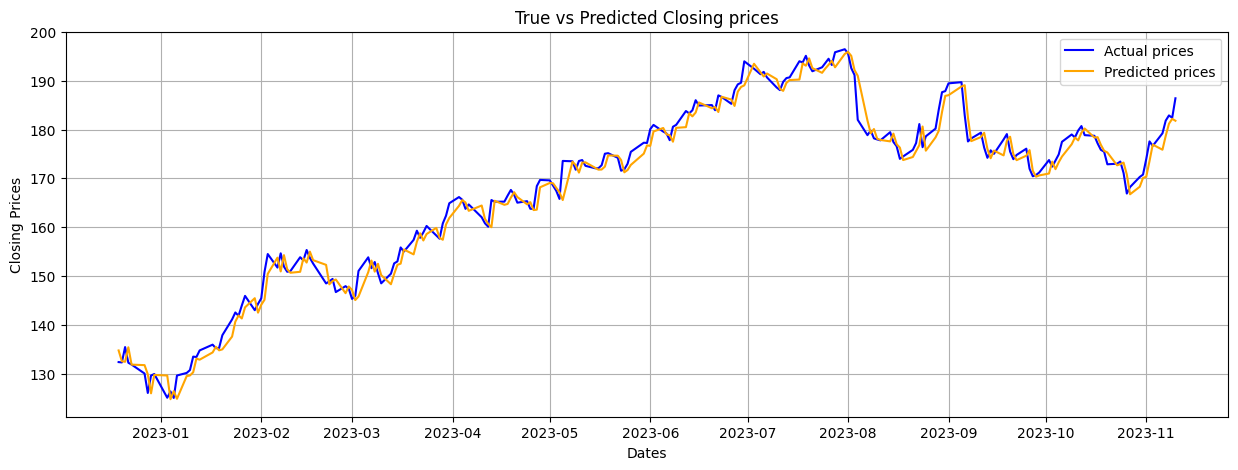

In [64]:
# Plot true vs predicted
y_test_pred_lstm_APPL = predict_and_plot(lstm_model_APPL, X_test_APPL, apple_stock)

In [65]:
# Original Scale MSE
original_mse = mean_squared_error(apple_stock['closing_price'][-len(y_test_pred_lstm_APPL):], y_test_pred_lstm_APPL)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 5.336160415839465


In [66]:
# Append the model information to the dataframe
model_performance_AAPL.loc[len(model_performance_AAPL)] = ["LSTM", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

### **TESLA**

#### Baseline - Feed Forward Network

In [67]:
# Create an GRU model for Tesla's stock data
feedforward_model_TSLA = create_feedforward_model(X_train_TSLA)

# model summary
feedforward_model_TSLA.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 149, 4)            8         
                                                                 
 flatten_1 (Flatten)         (None, 596)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 597       
                                                                 
Total params: 605 (2.36 KB)
Trainable params: 605 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# Train the GRU model with Tesla's stock data
feedforward_model_TSLA, history = train_model(feedforward_model_TSLA, X_train_TSLA, y_train_TSLA, X_valid_TSLA, y_valid_TSLA)

Epoch 1/50
29/29 [==============================] - 1s 9ms/step - loss: 2.2622e-04 - mean_absolute_error: 0.0113 - val_loss: 1.2331e-04 - val_mean_absolute_error: 0.0088
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 1.6043e-04 - mean_absolute_error: 0.0093 - val_loss: 1.1208e-04 - val_mean_absolute_error: 0.0083
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 1.3292e-04 - mean_absolute_error: 0.0083 - val_loss: 9.1215e-05 - val_mean_absolute_error: 0.0074
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 1.1825e-04 - mean_absolute_error: 0.0078 - val_loss: 8.7624e-05 - val_mean_absolute_error: 0.0073
Epoch 5/50
29/29 [==============================] - 0s 6ms/step - loss: 1.1146e-04 - mean_absolute_error: 0.0075 - val_loss: 8.5488e-05 - val_mean_absolute_error: 0.0072
Epoch 6/50
29/29 [==============================] - 0s 6ms/step - loss: 1.0733e-04 - mean_absolute_error: 0.0074 - val_loss: 8.4256e-05 - val_mean_abs

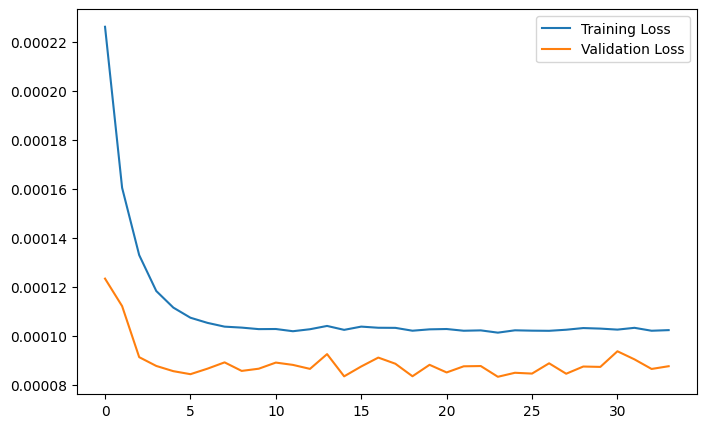

In [69]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [70]:
# Evaluate the model on the test data using
test_results = evaluate_model(feedforward_model_TSLA, X_test_TSLA, y_test_TSLA)

Evaluate on test data
8/8 [==============================] - 0s 3ms/step - loss: 7.8132e-05 - mean_absolute_error: 0.0067
Test MSE: 7.813190313754603e-05
Test MAE: 0.006723983213305473


8/8 [==============================] - 0s 2ms/step


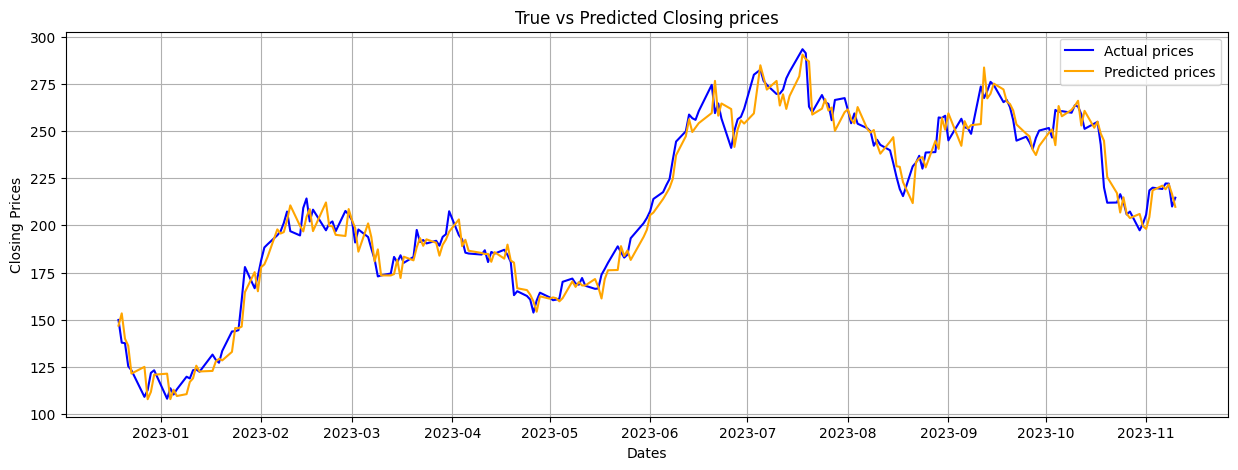

In [71]:
# Plot true vs predicted
y_test_pred_feedforward_TSLA = predict_and_plot(feedforward_model_TSLA, X_test_TSLA, tesla_stock)

In [72]:
# Original Scale MSE
original_mse = mean_squared_error(tesla_stock['closing_price'][-len(y_test_pred_feedforward_TSLA):], y_test_pred_feedforward_TSLA)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 62.211105339577486


In [73]:
# Append the model information to the dataframe
model_performance_TSLA.loc[len(model_performance_TSLA)] = ["Feed Forward", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

#### Simple RNN

In [74]:
# Create an RNN model for Tesla's stock data
rnn_model_TSLA = create_simple_rnn_model(X_train_TSLA)

# model summary
rnn_model_TSLA.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Train the RNN model with Tesla's stock data
rnn_model_TSLA, history = train_model(rnn_model_TSLA, X_train_TSLA, y_train_TSLA, X_valid_TSLA, y_valid_TSLA)

Epoch 1/50
29/29 [==============================] - 2s 45ms/step - loss: 7.7175e-04 - mean_absolute_error: 0.0185 - val_loss: 1.4578e-04 - val_mean_absolute_error: 0.0093
Epoch 2/50
29/29 [==============================] - 1s 25ms/step - loss: 2.0915e-04 - mean_absolute_error: 0.0105 - val_loss: 1.1384e-04 - val_mean_absolute_error: 0.0083
Epoch 3/50
29/29 [==============================] - 1s 24ms/step - loss: 1.6974e-04 - mean_absolute_error: 0.0092 - val_loss: 1.0424e-04 - val_mean_absolute_error: 0.0079
Epoch 4/50
29/29 [==============================] - 1s 24ms/step - loss: 1.5272e-04 - mean_absolute_error: 0.0087 - val_loss: 9.7164e-05 - val_mean_absolute_error: 0.0076
Epoch 5/50
29/29 [==============================] - 1s 45ms/step - loss: 1.5064e-04 - mean_absolute_error: 0.0088 - val_loss: 9.7932e-05 - val_mean_absolute_error: 0.0077
Epoch 6/50
29/29 [==============================] - 1s 49ms/step - loss: 1.3598e-04 - mean_absolute_error: 0.0082 - val_loss: 1.0185e-04 - val_me

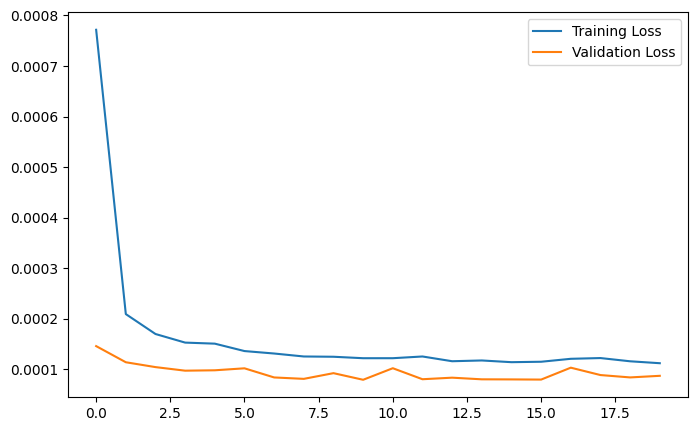

In [76]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [77]:
# Evaluate the model on the test data using
test_results = evaluate_model(rnn_model_TSLA, X_test_TSLA, y_test_TSLA)

Evaluate on test data
8/8 [==============================] - 0s 13ms/step - loss: 7.2212e-05 - mean_absolute_error: 0.0064
Test MSE: 7.221181294880807e-05
Test MAE: 0.006354478653520346


8/8 [==============================] - 0s 12ms/step


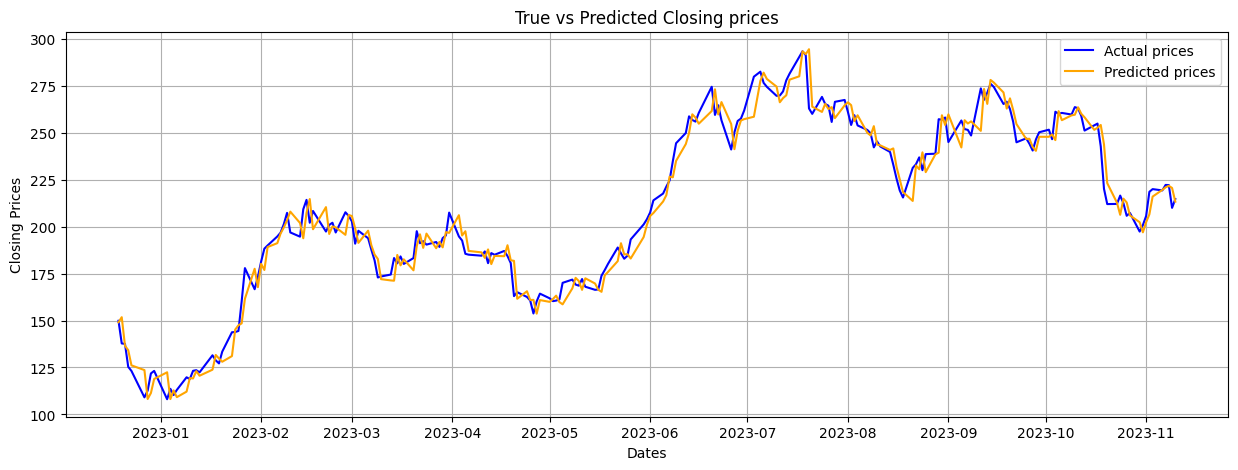

In [78]:
# Plot true vs predicted
y_test_pred_rnn_TSLA = predict_and_plot(rnn_model_TSLA, X_test_TSLA, tesla_stock)

In [79]:
# Original Scale MSE
original_mse = mean_squared_error(tesla_stock['closing_price'][-len(y_test_pred_rnn_TSLA):], y_test_pred_rnn_TSLA)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 56.96600857601115


In [80]:
# Append the model information to the dataframe
model_performance_TSLA.loc[len(model_performance_TSLA)] = ["Simple RNN", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

#### LSTM

In [81]:
# Create an LSTM model for Tesla's stock data
lstm_model_TSLA = create_lstm_model(X_train_TSLA)

# model summary
lstm_model_TSLA.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Train the LSTM model with Tesla's stock data
lstm_model_TSLA, history = train_model(lstm_model_TSLA, X_train_TSLA, y_train_TSLA, X_valid_TSLA, y_valid_TSLA)

Epoch 1/50
29/29 [==============================] - 5s 82ms/step - loss: 1.3148e-04 - mean_absolute_error: 0.0082 - val_loss: 7.4545e-05 - val_mean_absolute_error: 0.0067
Epoch 2/50
29/29 [==============================] - 2s 60ms/step - loss: 1.1857e-04 - mean_absolute_error: 0.0074 - val_loss: 9.0516e-05 - val_mean_absolute_error: 0.0073
Epoch 3/50
29/29 [==============================] - 2s 73ms/step - loss: 1.2011e-04 - mean_absolute_error: 0.0076 - val_loss: 7.4971e-05 - val_mean_absolute_error: 0.0067
Epoch 4/50
29/29 [==============================] - 2s 67ms/step - loss: 1.1702e-04 - mean_absolute_error: 0.0073 - val_loss: 7.5871e-05 - val_mean_absolute_error: 0.0066
Epoch 5/50
29/29 [==============================] - 2s 69ms/step - loss: 1.1637e-04 - mean_absolute_error: 0.0073 - val_loss: 7.4432e-05 - val_mean_absolute_error: 0.0066
Epoch 6/50
29/29 [==============================] - 3s 105ms/step - loss: 1.1690e-04 - mean_absolute_error: 0.0074 - val_loss: 9.8949e-05 - val_m

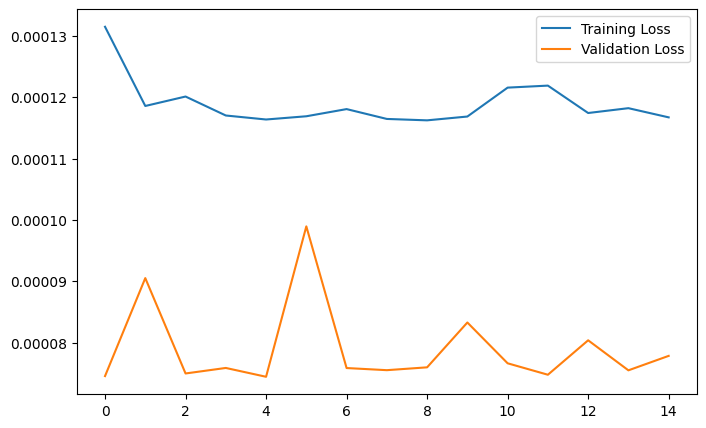

In [83]:
# Plot the history information
pd.DataFrame({'Training Loss': history.history['loss'],
                   'Validation Loss': history.history['val_loss']}).plot(figsize=(8 , 5))
plt.show()

In [84]:
# Evaluate the model on the test data using
test_results = evaluate_model(lstm_model_TSLA, X_test_TSLA, y_test_TSLA)

Evaluate on test data
8/8 [==============================] - 0s 27ms/step - loss: 6.6144e-05 - mean_absolute_error: 0.0060
Test MSE: 6.614412268390879e-05
Test MAE: 0.006019082386046648


8/8 [==============================] - 1s 16ms/step


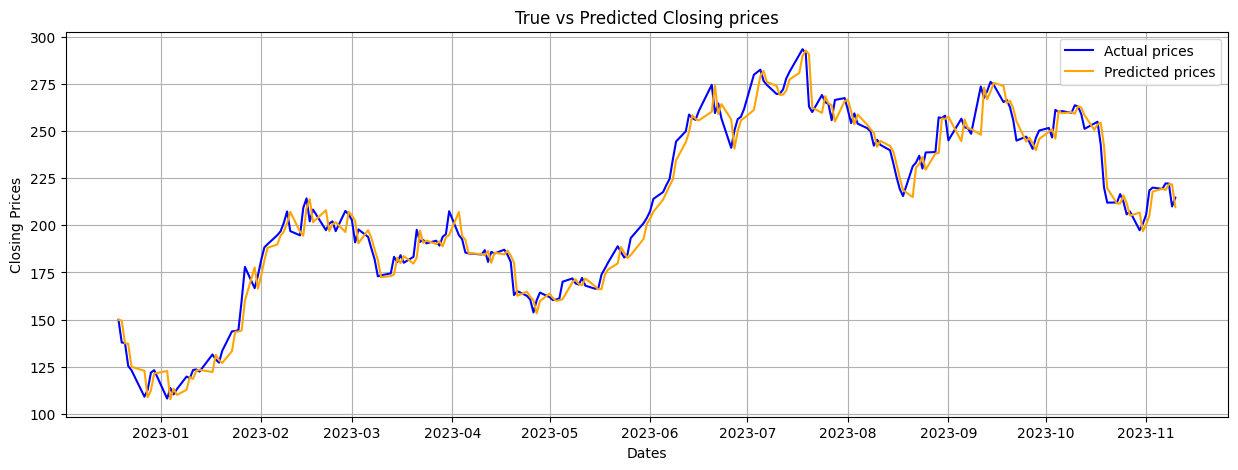

In [85]:
y_test_pred_lstm_TSLA = predict_and_plot(lstm_model_TSLA, X_test_TSLA, tesla_stock)

In [86]:
# Original Scale MSE
original_mse = mean_squared_error(tesla_stock['closing_price'][-len(y_test_pred_lstm_TSLA):], y_test_pred_lstm_TSLA)
print('MSE when data scaled back to original values is', original_mse)

MSE when data scaled back to original values is 53.78573619815337


In [87]:
# Append the model information to the dataframe
model_performance_TSLA.loc[len(model_performance_TSLA)] = ["LSTM", history.history['loss'][-1],
                                                           history.history['val_mean_absolute_error'][-1], test_results[0],
                                                           test_results[1], original_mse]

<br/>

<br/>

### **7. PERFORMANCE COMPARISION**

In [88]:
# Model performances on Apple stock
model_performance_AAPL

,network,validation_mse,validation_mae,test_mse,test_mae,original_scale_test_rmse
0,Feed Forward,0.000022,0.004168,0.000013,0.002794,6.557882
1,Simple RNN,0.000024,0.004137,0.000011,0.002512,5.670188
2,LSTM,0.000026,0.004072,0.000010,0.002425,5.336160


In [89]:
# Model performances on Tesla stock
model_performance_TSLA

,network,validation_mse,validation_mae,test_mse,test_mae,original_scale_test_rmse
0,Feed Forward,0.000102,0.007212,0.000078,0.006724,62.211105
1,Simple RNN,0.000112,0.007412,0.000072,0.006354,56.966009
2,LSTM,0.000117,0.006678,0.000066,0.006019,53.785736


**LSTM model performs better out of all the three models**


<br/>

<br/>

### 8. FUTURE PREDICTIONS

Let's also predict future closing prices for the next 30 days for **Apple**

In [90]:
# The last sequence from the test set which will be used to make future predictions
last_sequence = X_test_APPL[-1, :, :]

# Initialize an empty list to store the future predictions
future_predictions = []

# Loop to generate predictions for the next 30 days
for _ in range(30):
    # Predict the next value using the LSTM model
    last_sequence_pred = lstm_model_APPL.predict(last_sequence.reshape(1, 149, 1))

    # Append the predicted value to the list of future predictions
    future_predictions.append(last_sequence_pred[0, 0])

    # Roll the last_sequence array to the left and insert the last predicted value at the end
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = last_sequence_pred

# Cumulative sum of predictions to get the forecasted log prices
cumulative_future_predictions = np.cumsum(future_predictions)

# Retrieve the last actual log closing price from the stock data
last_actual_log_price = apple_stock['log_closing_price'].values[-1]

# Adjust the future predictions by adding the last actual log closing price
adjusted_future_predictions = [x + last_actual_log_price for x in cumulative_future_predictions]

# Square the predictions to revert the differencing and then exponentiate to get back to the original price scale
pred_closing_prices_log = np.square(adjusted_future_predictions)
pred_closing_prices = np.exp(pred_closing_prices_log)

# Insert the last known actual closing price into the predicted prices array as a base for the plot
final_predictions = np.insert(pred_closing_prices, 0, y_test_pred_lstm_APPL.iloc[-1]['closing_price'])

1/1 [==============================] - 0s 26ms/step


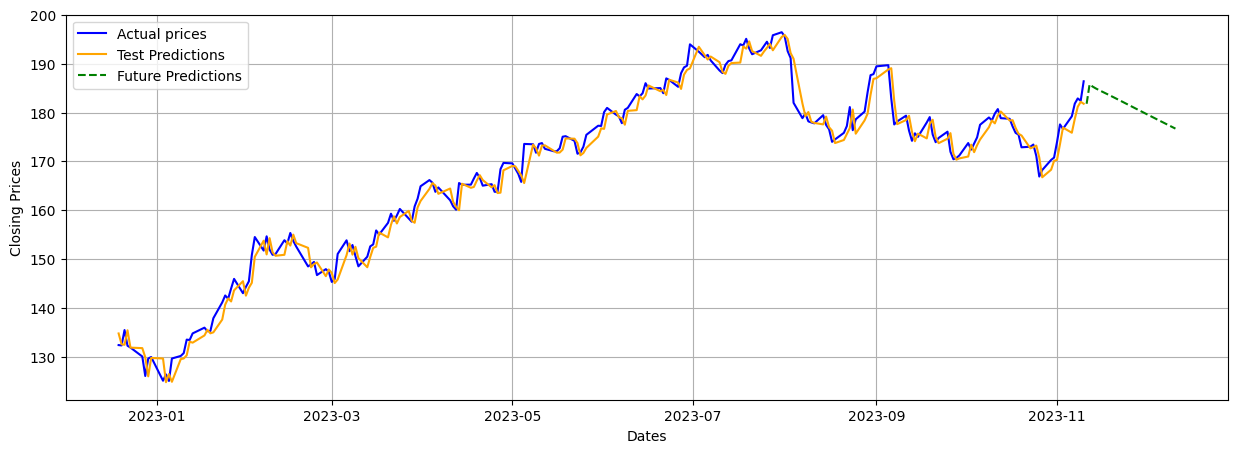

In [91]:
def predict_and_plot(model, X_test, stock_data, future_pred, y_test_pred, n_future=10):
    """
    Plot actual vs. model-predicted AAPL stock closing prices.

    Parameters:
    - model: Pre-trained model for making predictions.
    - X_test: Feature set for model predictions.
    - stock_data: Actual stock data with 'Date' and 'closing_price'.
    - future_pred: Predicted stock prices for future dates.
    - y_test_pred: Model's predictions on X_test.
    - n_future: Number of days to predict ahead from the last date in X_test.
    """
    # Generate dates for future predictions
    last_date = stock_data.Date.iloc[-1]
    future_dates = [last_date + timedelta(days=i) for i in range(1, n_future + 1)]

    # Setup the plot for actual and predicted prices
    plt.figure(figsize=(15, 5))
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')

    # Plot actual closing prices
    plt.plot(stock_data.Date[-len(X_test):], stock_data['closing_price'][-len(X_test):], 'b', label='Actual prices')

    # Plot model's test predictions
    plt.plot(stock_data.Date[-len(X_test):], y_test_pred, 'orange', label='Test Predictions')

    # Plot model's future price predictions
    plt.plot(future_dates, future_pred, 'g--', label='Future Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function call with all the necessary arguments
predict_and_plot(lstm_model_APPL, X_test_APPL, apple_stock, final_predictions, y_test_pred_lstm_APPL, 31)